### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [3413]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import pandas as pd
import numpy as np

#Import stats
import scipy.stats as stats
from scipy.stats import pearsonr

#Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Import for LabelEncoder
from sklearn.preprocessing import LabelEncoder

## Step 1: Reading and Understanding Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3414]:
# Read the given CSV file, and view some sample records

df_car = pd.read_csv('CarPrice_Assignment.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3415]:
#CarName contains the carname+model, keeping only car name as model not required
def str_map(x):
    return x.split(' ')[0]

df_car['CarName']=df_car['CarName'].apply(str_map)

df_car.CarName.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
toyouta         1
Nissan          1
mercury         1
porcshce        1
vokswagen       1
Name: CarName, dtype: int64

In [3416]:
#Some misspelling are here like 
# 'mazda as maxda',
# 'nissan as Nissan'
# 'porsche as porcshce'
# 'volkswagen as vokswagen'
# 'toyota as toyouta'

#Replacing the wrong spelling with correct ones
df_car['CarName']= df_car['CarName'].str.lower()

def replacestr(oldstr,newstr):
    df_car['CarName'].replace(oldstr,newstr,inplace=True)

replacestr('porcshce','porsche')
replacestr('maxda','mazda')
replacestr('vokswagen','volkswagen')
replacestr('toyouta','toyota')

df_car['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [3417]:
df_car.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
mercury         1
Name: CarName, dtype: int64

In [3418]:
#Check for duplicates
df_car.loc[df_car.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [3419]:
df_car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Findings:
1. Most of the car price is below 20K and max price goes till 45k
2. 75% car price is 17K

In [3420]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3421]:
# There is variable symboling which is categorical but datatype as int so change the type to category
df_car['symboling'] = df_car['symboling'].astype('category')
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null category
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm   

In [3422]:
# Missing Data

df_car_missing = df_car.count()/len(df_car)
df_car_missing = (1-df_car_missing)*100
df_car_missing.sort_values(ascending=False)

price               0.0
highwaympg          0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
car_ID              0.0
dtype: float64

No missing data in the dataset

### Step 2- Visualise the Data

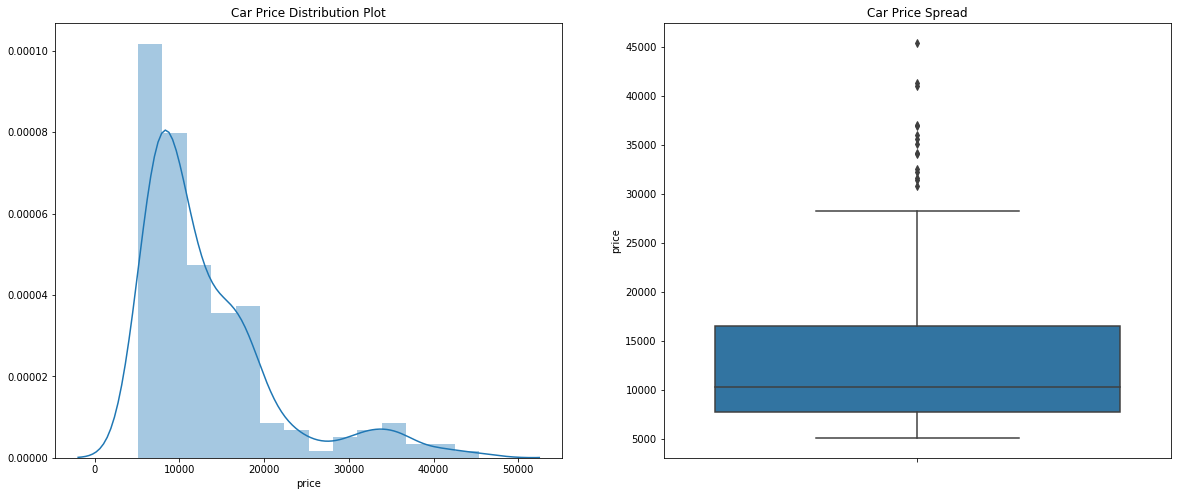

In [3423]:
# Visulaise the data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_car.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_car.price)

plt.show()

1. Most of the car price is below 20K and max price goes till 45k

### Univariate Analysis

In [3424]:
df_cat = df_car.select_dtypes(include=['object','category'])
df_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

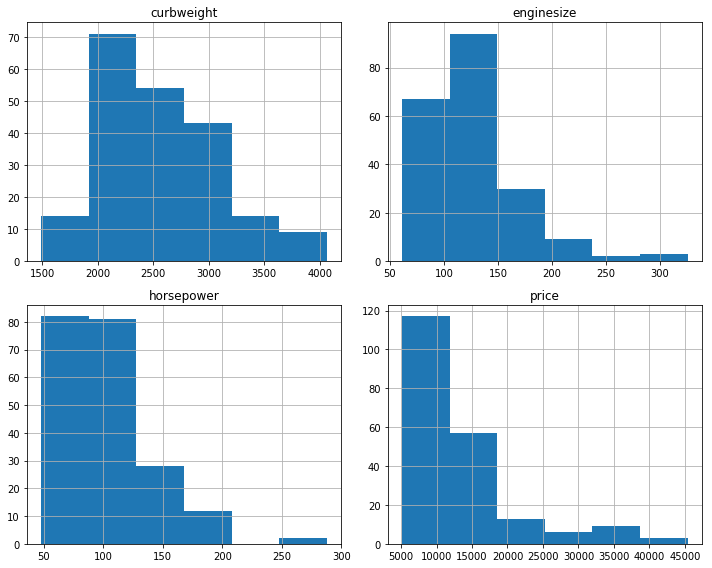

In [3425]:
df_car[['enginesize','curbweight','horsepower','price']].hist(figsize=(10,8),bins=6)
plt.tight_layout()
plt.show()

1. Engine and horspower are highly positive correlated
2. Mostly car price from 5000 to 15000
3. Mostly horspower car is having are 50 to 100
4. Mostly car enginesize varies from 70 to 130

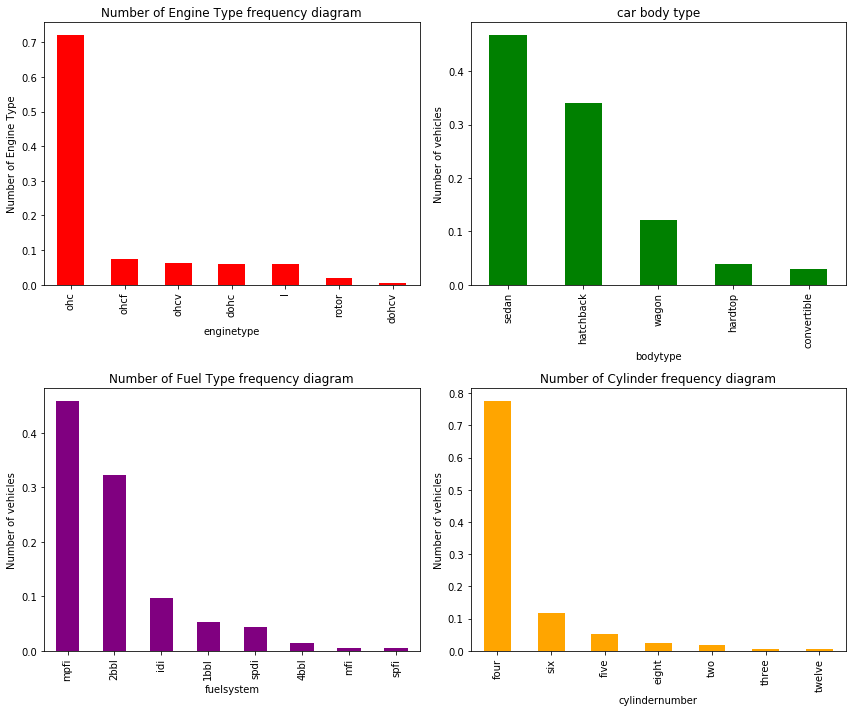

In [3426]:
plt.figure(1)
plt.subplot(221)
df_car['enginetype'].value_counts(normalize=True).plot(figsize=(12,10),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('enginetype');


plt.subplot(222)
df_car['carbody'].value_counts(normalize=True).plot(figsize=(12,10),kind='bar',color='green')
plt.title("car body type")
plt.ylabel('Number of vehicles')
plt.xlabel('bodytype');

plt.subplot(223)
df_car['fuelsystem'].value_counts(normalize= True).plot(figsize=(12,10),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuelsystem');

plt.subplot(224)
df_car['cylindernumber'].value_counts(normalize=True).plot(figsize=(12,10),kind='bar',color='orange')
plt.title("Number of Cylinder frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('cylindernumber');

plt.tight_layout()
plt.show()


It can be infer from above:
1. Mostly cars are having 4 cylinders
2. fuelsystem is mpfi and 2bbl
3. enginetype is ohc
4. preferred bodytype are sedan

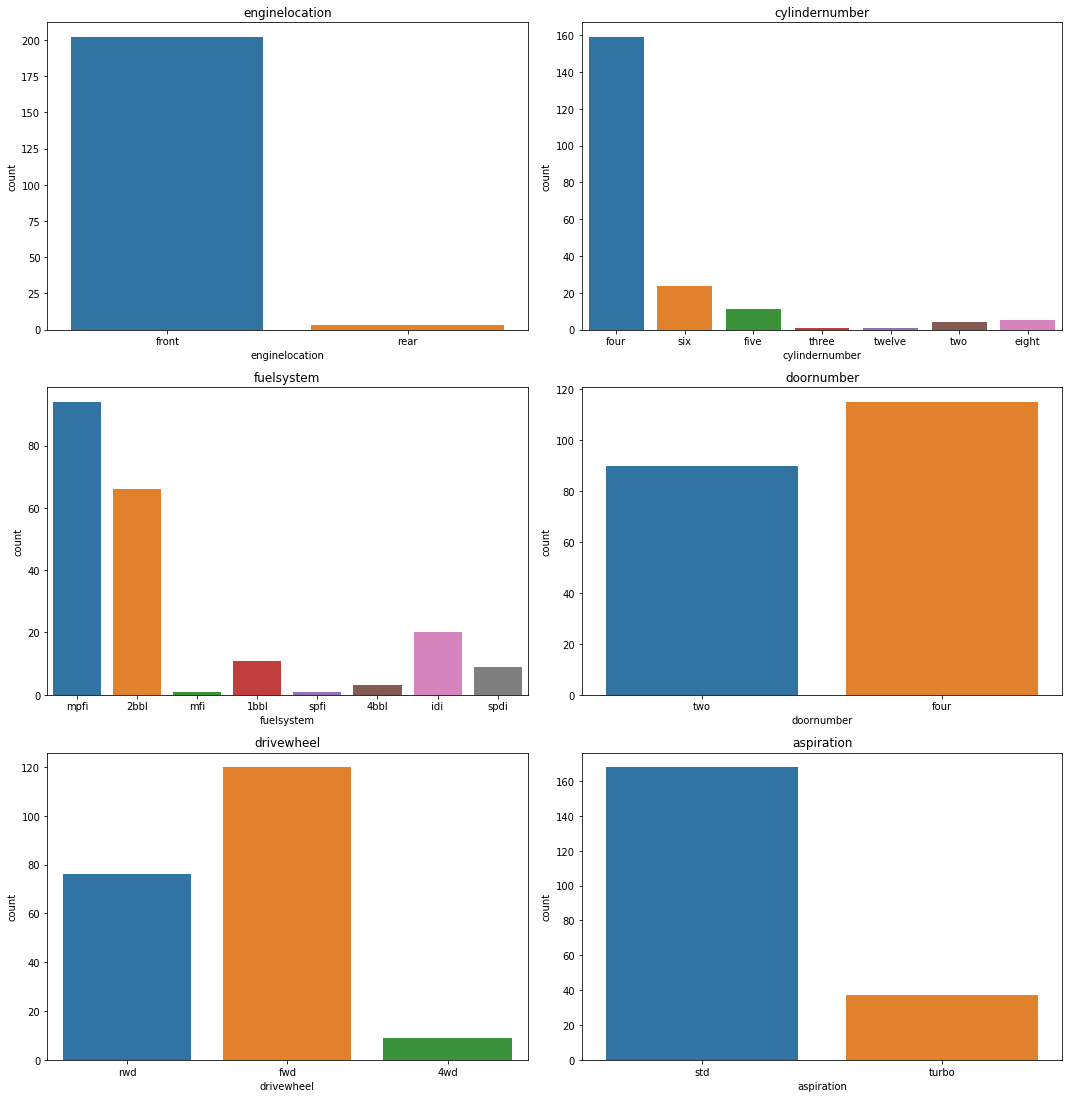

In [3427]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x)
    sns.countplot(df_car[x])
    
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 2)
plot_count('fuelsystem',3)
plot_count('doornumber', 4)
plot_count('drivewheel', 5)
plot_count('aspiration', 6)



plt.tight_layout()

1. Mostly engine location is front
2. dorrnumber can be two or four
3. drivewheel maximum is fwd
4. Aspiration mostly are std
5. Mostly cylinder number used in a car are 4 and fuel system is mpfi

Bivariate Analysis

### Categorical variables

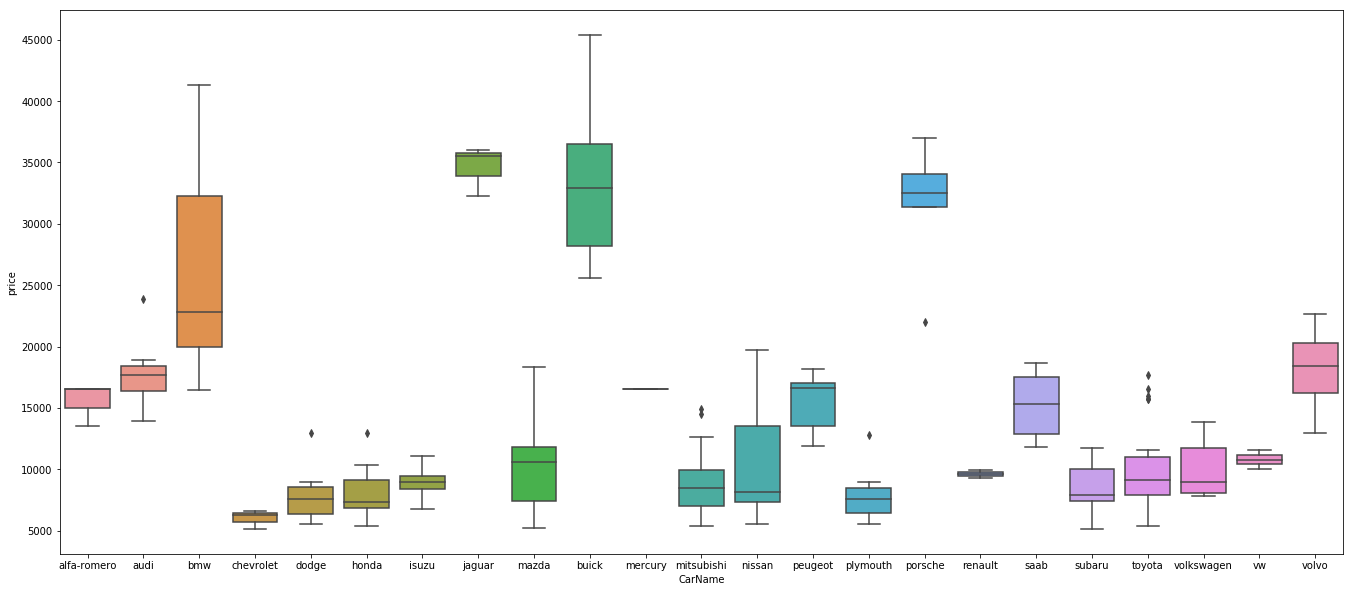

In [3428]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="CarName", y="price", data=df_car)

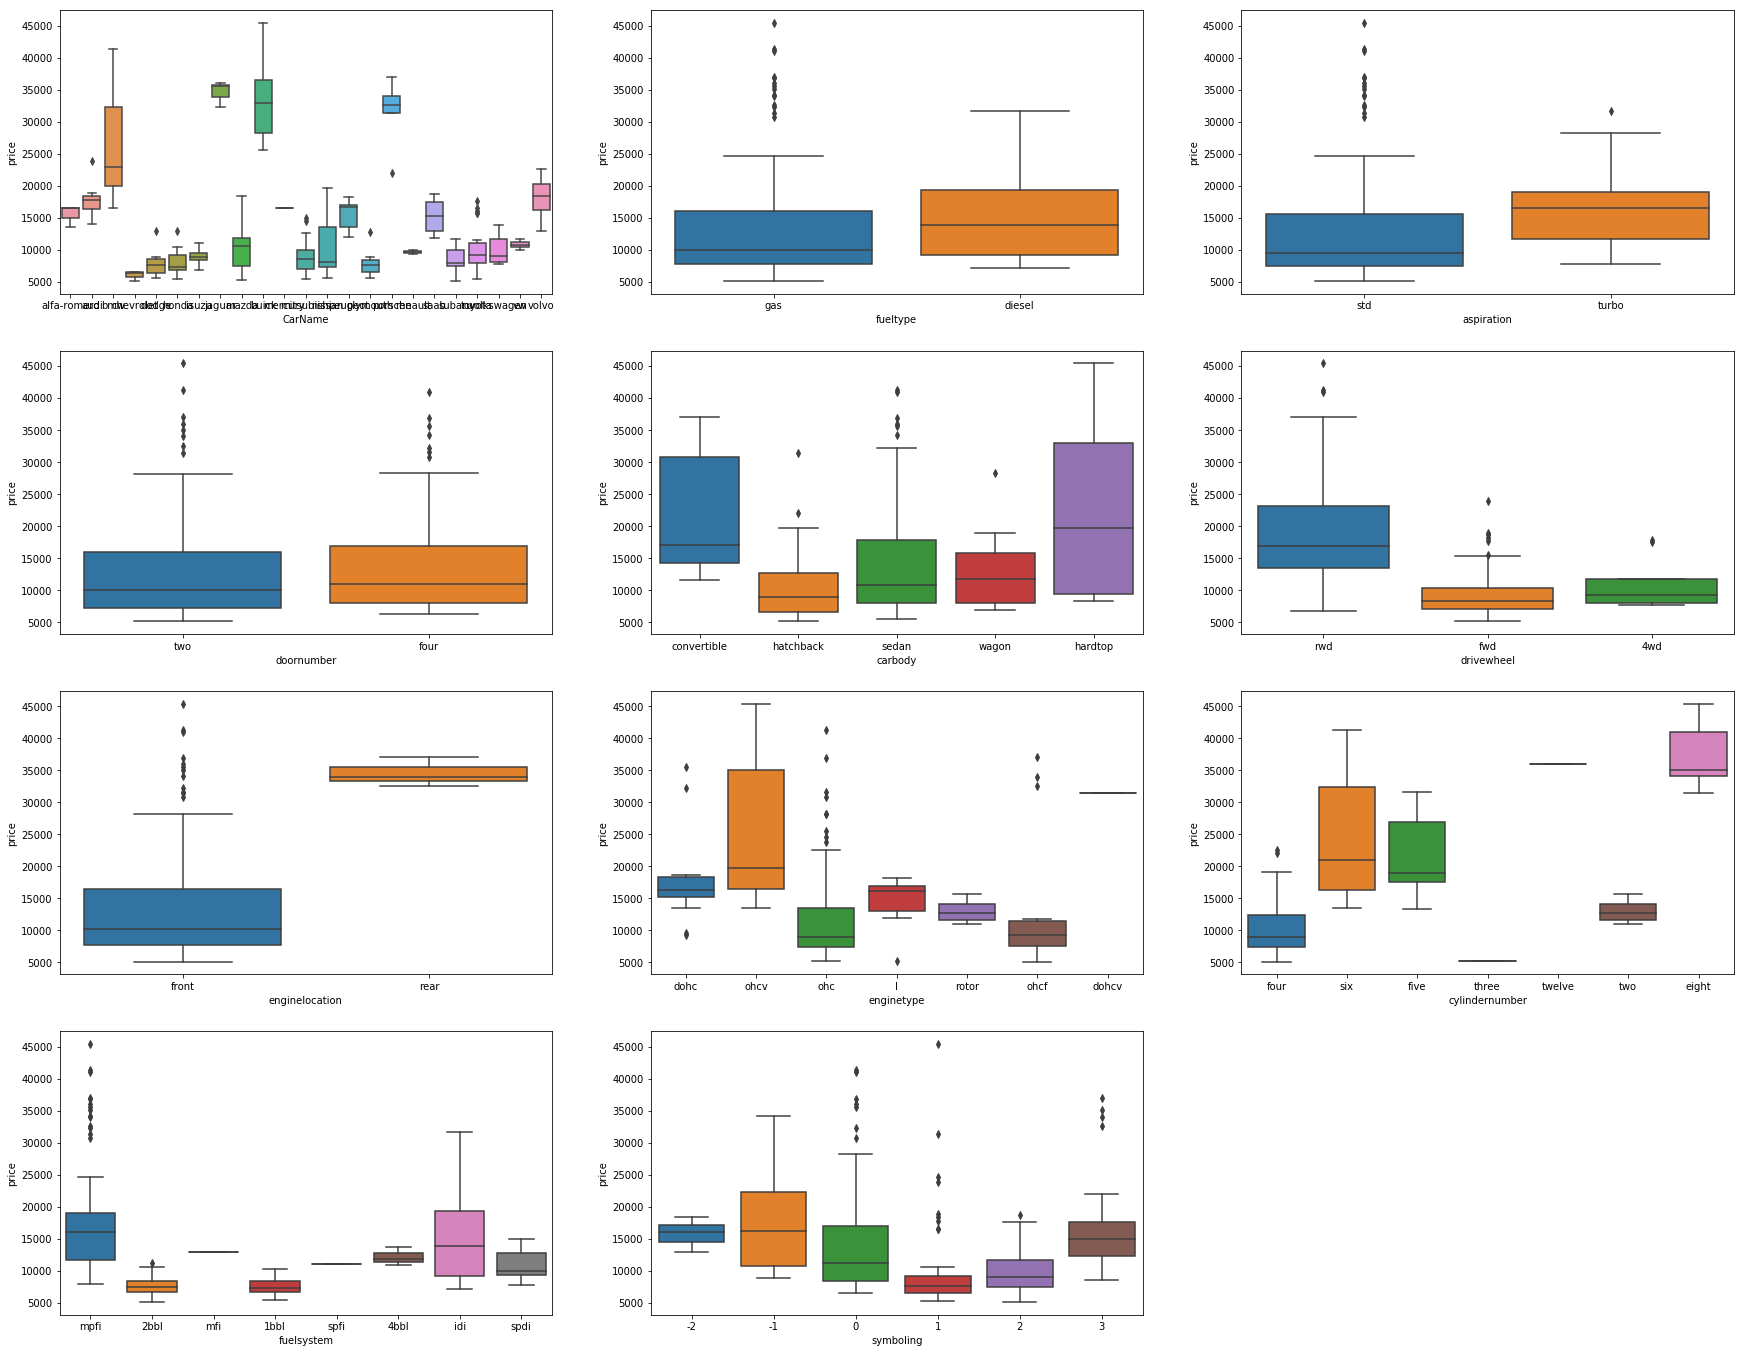

In [3429]:
# Visualise for categorical variables
cols = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginlocation','enginetype','cylindernumber'
       ,'fuelsystem']


plt.figure(figsize=(30, 24))
plt.subplot(4,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = df_car)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
plt.subplot(4,3,11)
sns.boxplot(x = 'symboling', y = 'price', data = df_car)
plt.show()

It can be infer from above:
1. BMW, Jaguar, Porshe produces expensive cars more than 25000
2. Hardtop model are expensive in prices followed by convertible and sedan body style
3. Turbo models have higher prices than for the standard model
4. Most high ranged cars seeme to prefer rwd drivewheel
5. Price of car high on categorical features - Diesel,turbo,engine locaion is rear but data points are less,enginetype is ohcv,8 cylinders
6. Doornumber having same median so no effect on price, lets drop that from dataset

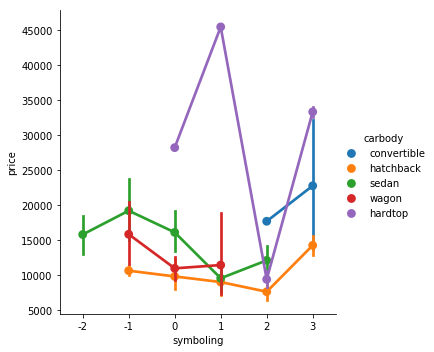

In [3430]:
sns.catplot(data=df_car, x="symboling" ,y="price", hue="carbody" ,kind="point")

##### Findings:
+3 - risky and -3 - safe
1. Hardtop is range from 0 to 3 and also high in price
2. Convertible is the most risky and high in price
3. sedan is safe and low in price but also ranging to 2 
4. wagon is between safe and unsafe
5. sysmboling does not depends on price


In [3431]:
#Drop doornumber as does not depends on price
df_car = df_car.drop(['doornumber'],axis=1)
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Numerical variables

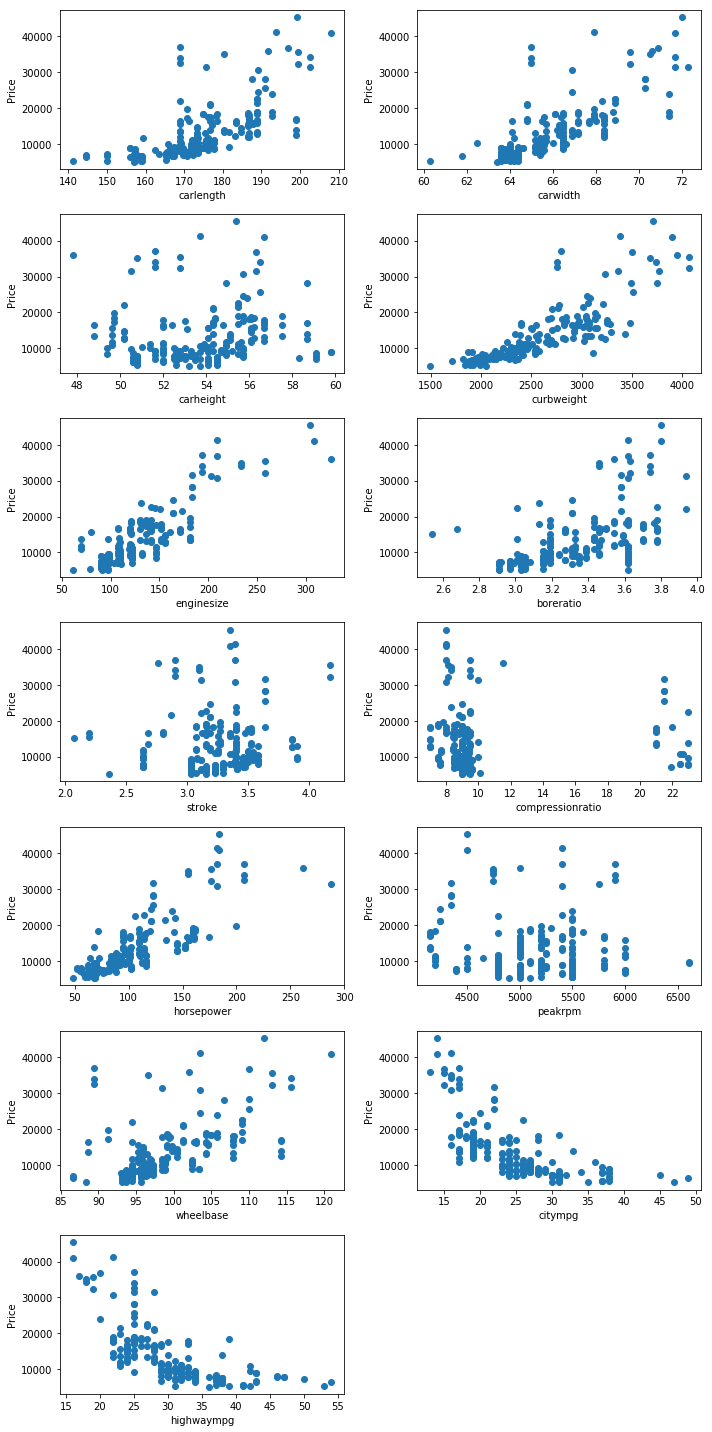

In [3432]:
def scatter(x,fig):
    plt.subplot(7,2,fig)
    plt.scatter(df_car[x],df_car['price'])
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('enginesize', 5)
scatter('boreratio', 6)
scatter('stroke', 7)
scatter('compressionratio', 8)
scatter('horsepower', 9)
scatter('peakrpm', 10)
scatter('wheelbase', 11)
scatter('citympg', 12)
scatter('highwaympg', 13)

plt.tight_layout()

Findings:
1. carlength and carwidth highly correlated
2. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
3. carheight,stroke and peakspm no relation with price
4. citympg, highwaympg - seem to have a significant negative correlation with price.

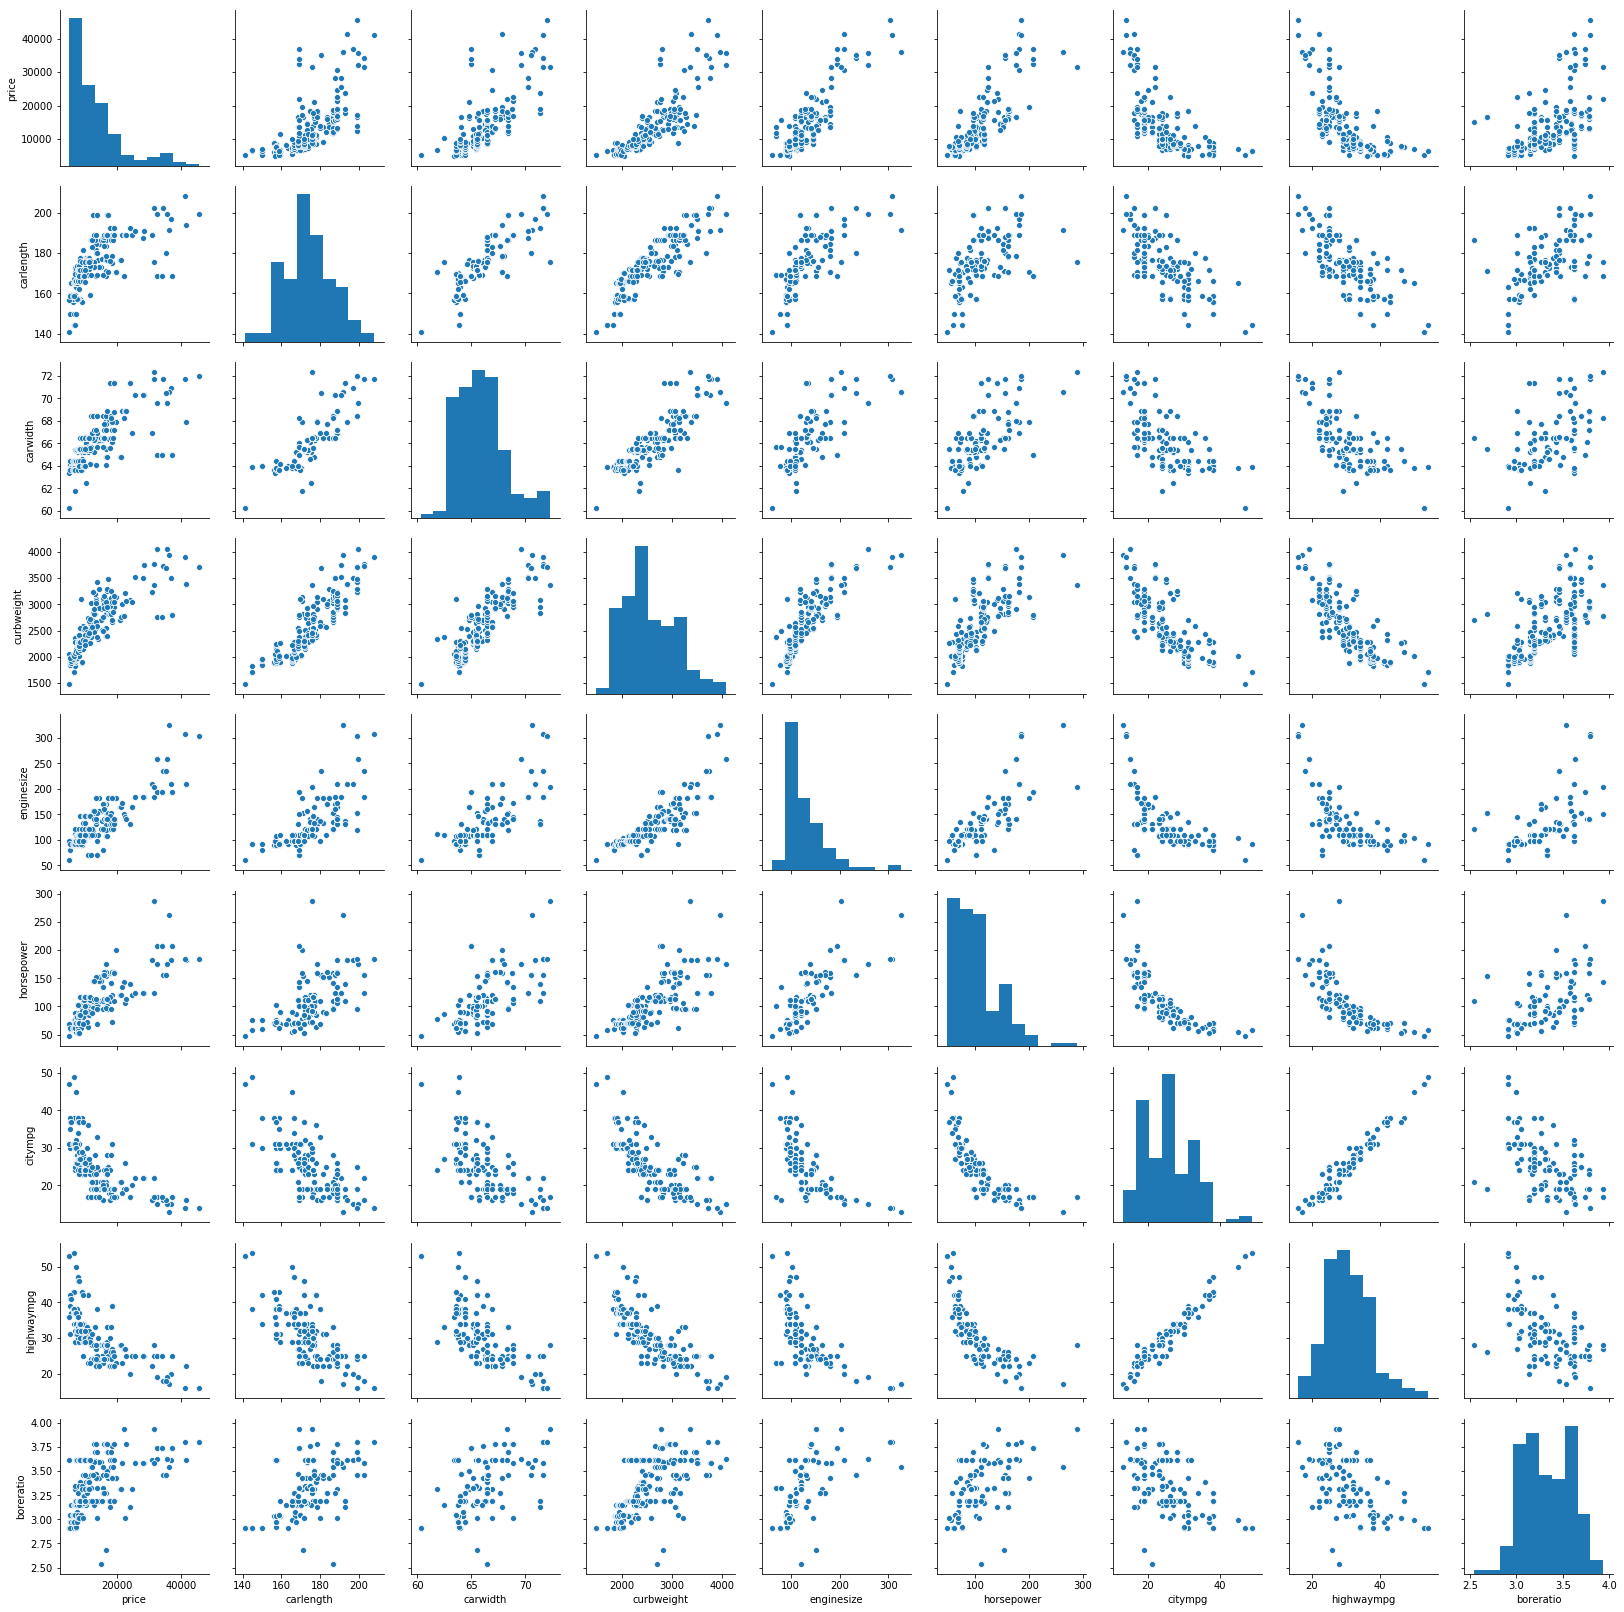

In [3433]:
#pairplot for correlated numeric variables
cols= ['price','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio']
sns.pairplot(df_car[cols])
plt.show()

It can be infer from above:
1. The relation is linear and positive with carlength,carwidth,curbweight,enginesize,horsepower,boreration with Price
2. The relation is linear and negative with citympg and highwaympg with Price

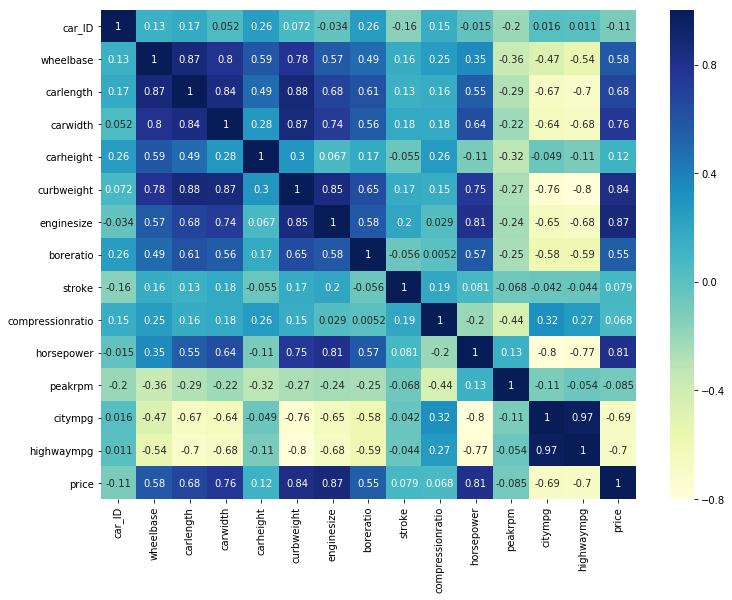

In [3434]:
#Check the coorelation by plotting heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_car.corr(), cmap="YlGnBu", annot = True)
plt.show()

Finding the Highly positive correlation

In [3435]:
correlation_0 = df_car.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[correlation_0 > 0.70]
print(round(corr,4))

highwaympg  carlength     0.7047
carlength   highwaympg    0.7047
carwidth    enginesize    0.7354
enginesize  carwidth      0.7354
horsepower  curbweight    0.7507
curbweight  horsepower    0.7507
            citympg       0.7574
citympg     curbweight    0.7574
price       carwidth      0.7593
carwidth    price         0.7593
highwaympg  horsepower    0.7705
horsepower  highwaympg    0.7705
curbweight  wheelbase     0.7764
wheelbase   curbweight    0.7764
            carwidth      0.7951
carwidth    wheelbase     0.7951
highwaympg  curbweight    0.7975
curbweight  highwaympg    0.7975
citympg     horsepower    0.8015
horsepower  citympg       0.8015
price       horsepower    0.8081
horsepower  price         0.8081
            enginesize    0.8098
enginesize  horsepower    0.8098
price       curbweight    0.8353
curbweight  price         0.8353
carwidth    carlength     0.8411
carlength   carwidth      0.8411
enginesize  curbweight    0.8506
curbweight  enginesize    0.8506
carwidth  

In [3436]:
'''
Top correlations are:
1. highwaympg        citympg             0.9713
3. carlength         curbweight          0.8777
4. wheelbase         carlength           0.8746
5. price             enginesize          0.8741
6. carwidth          curbweight          0.8670
7. curbweight        enginesize          0.8506
8. carwidth          carlength           0.8411
9. curbweight        price               0.8353
10. horsepower        enginesize          0.8098
11. horsepower        price               0.8081
12. citympg           horsepower          0.8015
13. curbweight        highwaympg          0.7975
14. wheelbase         carwidth            0.7951
15. wheelbase         curbweight          0.7764
16. highwaympg        horsepower          0.7705

Correlation with Price
1. enginesize
2. curbweight
3. horsepower
4. carwidth
5. carlength
6. highwaympg
7. wheelbase
8. boreratio

No Correlation with Price
1. symboling
2. compressionratio
3. stroke
4. peakrpm
5. carheight

'''

'\nTop correlations are:\n1. highwaympg        citympg             0.9713\n3. carlength         curbweight          0.8777\n4. wheelbase         carlength           0.8746\n5. price             enginesize          0.8741\n6. carwidth          curbweight          0.8670\n7. curbweight        enginesize          0.8506\n8. carwidth          carlength           0.8411\n9. curbweight        price               0.8353\n10. horsepower        enginesize          0.8098\n11. horsepower        price               0.8081\n12. citympg           horsepower          0.8015\n13. curbweight        highwaympg          0.7975\n14. wheelbase         carwidth            0.7951\n15. wheelbase         curbweight          0.7764\n16. highwaympg        horsepower          0.7705\n\nCorrelation with Price\n1. enginesize\n2. curbweight\n3. horsepower\n4. carwidth\n5. carlength\n6. highwaympg\n7. wheelbase\n8. boreratio\n\nNo Correlation with Price\n1. symboling\n2. compressionratio\n3. stroke\n4. peakrpm\n5. c

It can be infer from above:
1. Price is positive correlated with carwidth,curbweight,enginesize,horsepower
2. Price is negative correlated with citympg,highwaympg
3. Multicollinear can be seen in (highwaympg,citympg), (horsepower,carwidth),(horsepower,curbweight),(horsepower,enginesize),
(boreratio,carlength),(boreratio,curbweight),(enginesize,carlength),(enignesize,carwidth),(curbweight,wheelbase),(curbweight,carwidth),(curbweight,carlength),(curbweight,enginesize),(carwidth,carlength),('wheelbase,carlength)
4. peakrpm,carheight,stroke no correlation with price and other variables

In [3437]:
# From the heatmap we found that peakrpm,carheight,stroke no correlation with price lets, see the 
#coorelation and p_value
print(stats.pearsonr(df_car['price'],df_car['carheight']))
print(stats.pearsonr(df_car['price'],df_car['stroke']))
print(stats.pearsonr(df_car['price'],df_car['peakrpm']))
print(stats.pearsonr(df_car['price'],df_car['symboling']))
print(stats.pearsonr(df_car['price'],df_car['compressionratio']))

(0.11933622657049443, 0.08832832352275148)
(0.07944308388193101, 0.2575137159090907)
(-0.08526715027785685, 0.224141234446669)
(-0.07997822464270352, 0.2543117584863483)
(0.06798350579944266, 0.3327723612238065)


From Above the correlation is also low and p-values not significant for any of the feature so dropping it

In [3438]:
df_car = df_car.drop(['carheight','stroke','peakrpm','compressionratio','symboling'],axis=1)
df_car.head()

,car_ID,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,2,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,3,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,4,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,5,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [3439]:
# car_ID is not seems important column as it is just id of car, not any feature so dropping it
df_car = df_car.drop('car_ID',axis=1)
df_car.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


## Step3. Deriving new feature 'fueleconomy' and 'carsrange'

In [3440]:
#Combined fuel economy is a weighted average of City and Highway MPG values 
#that is calculated by weighting the City value by 55% and the Highway value by 45%.
#Fuel economy
df_car['fueleconomy'] = (0.55 * df_car['citympg']) + (0.45 * df_car['highwaympg'])

In [3441]:
#Create a carsrange column based on group of prices binning as high,medium,low
df_car['price'] = df_car['price'].astype('int')
temp = df_car.copy()
table = temp.groupby(['CarName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
car_bin=['Low','Medium','High']
df_car['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
df_car.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,fueleconomy,carsrange
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,...,four,130,mpfi,3.47,111,21,27,13495,23.70,Medium
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,...,four,130,mpfi,3.47,111,21,27,16500,23.70,Medium
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,...,six,152,mpfi,2.68,154,19,26,16500,22.15,Medium
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,...,four,109,mpfi,3.19,102,24,30,13950,26.70,Medium
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,...,five,136,mpfi,3.19,115,18,22,17450,19.80,Medium


In [3442]:
df_car.columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'price', 'fueleconomy',
       'carsrange'],
      dtype='object')

### List of significant variables after EDA are:



1.	price
2.	fueltype 
3.	aspiration
4.	carbody 
5.	drivewheel
6.	enginelocation
7.	wheelbase
8.	curbweight 
9.	enginetype 
10.	cylindernumber 
11.	enginesize
12.	fuelsystem 
13.	boreratio
14.	horsepower 
15.	fueleconomy 
16.	carlength
17.	carwidth 
18.	carsrange

In [3443]:
#copy the df for regression

car_lr = df_car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','enginelocation','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize','fuelsystem', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth','carsrange']]
car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,115,19.80,176.6,66.4,Medium


### Step 4 Convert binary values variables to 0 and 1

In [3444]:
car_lr["enginelocation"].value_counts()
#Lets change front to 1 and rear to 0
car_lr["enginelocation_Code"] = np.where(car_lr["enginelocation"].str.contains("front"), 1, 0)
car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,enginelocation_Code
0,13495,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
1,16500,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
2,16500,gas,std,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,154,22.15,171.2,65.5,Medium,1
3,13950,gas,std,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,102,26.70,176.6,66.2,Medium,1
4,17450,gas,std,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,115,19.80,176.6,66.4,Medium,1


In [3445]:
#cylindernum contains number so lets replcae string with numbers
nums = {"four":4,"six":6,"five":5,"eight":8,"two":2,"twelve":12,"three":3}
car_lr['cylindernumber'].replace(nums, inplace=True)
car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,enginelocation_Code
0,13495,gas,std,convertible,rwd,front,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
1,16500,gas,std,convertible,rwd,front,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
2,16500,gas,std,hatchback,rwd,front,94.5,2823,ohcv,6,152,mpfi,2.68,154,22.15,171.2,65.5,Medium,1
3,13950,gas,std,sedan,fwd,front,99.8,2337,ohc,4,109,mpfi,3.19,102,26.70,176.6,66.2,Medium,1
4,17450,gas,std,sedan,4wd,front,99.4,2824,ohc,5,136,mpfi,3.19,115,19.80,176.6,66.4,Medium,1


In [3446]:
#drop enginelocation as encoded to new column enginelocation_code
car_lr = car_lr.drop(['enginelocation'],axis=1)

car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,enginelocation_Code
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium,1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,6,152,mpfi,2.68,154,22.15,171.2,65.5,Medium,1
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,4,109,mpfi,3.19,102,26.70,176.6,66.2,Medium,1
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,5,136,mpfi,3.19,115,19.80,176.6,66.4,Medium,1


### Step 5. Dummy Variables for Categorical variables to convert into numeric for model

In [3447]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

car_lr = dummies('fueltype',car_lr)
car_lr = dummies('aspiration',car_lr)
car_lr = dummies('carbody',car_lr)
car_lr = dummies('drivewheel',car_lr)
car_lr = dummies('enginetype',car_lr)
car_lr = dummies('fuelsystem',car_lr)
car_lr = dummies('carsrange',car_lr)

In [3448]:
car_lr.head()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,13495,88.6,2548,4,130,3.47,111,23.70,168.8,64.1,...,0,0,0,0,0,1,0,0,1,0
1,16500,88.6,2548,4,130,3.47,111,23.70,168.8,64.1,...,0,0,0,0,0,1,0,0,1,0
2,16500,94.5,2823,6,152,2.68,154,22.15,171.2,65.5,...,0,0,0,0,0,1,0,0,1,0
3,13950,99.8,2337,4,109,3.19,102,26.70,176.6,66.2,...,0,0,0,0,0,1,0,0,1,0
4,17450,99.4,2824,5,136,3.19,115,19.80,176.6,66.4,...,0,0,0,0,0,1,0,0,1,0


In [3449]:
car_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
price                  205 non-null int32
wheelbase              205 non-null float64
curbweight             205 non-null int64
cylindernumber         205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
horsepower             205 non-null int64
fueleconomy            205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
enginelocation_Code    205 non-null int32
gas                    205 non-null uint8
turbo                  205 non-null uint8
hardtop                205 non-null uint8
hatchback              205 non-null uint8
sedan                  205 non-null uint8
wagon                  205 non-null uint8
fwd                    205 non-null uint8
rwd                    205 non-null uint8
dohcv                  205 non-null uint8
l                      205 non-null uint8
ohc

### Step 6. Splitting the data into Training and Testing Sets

In [3450]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 42)

### Step 7 Scaling the data using MinMax Scaler so no need to handle outliers

In [3451]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
#df_train
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [3452]:
df_train.head()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
177,0.152177,0.544828,0.284379,0.2,0.203125,0.550000,0.169492,0.530275,0.534483,0.447619,...,0,0,0,0,0,1,0,0,0,0
75,0.282632,0.555172,0.485536,0.2,0.273438,0.885714,0.521186,0.236697,0.582759,0.590476,...,0,0,0,0,0,1,0,0,1,0
174,0.138523,0.544828,0.294170,0.2,0.156250,0.521429,0.088983,0.607339,0.534483,0.447619,...,0,0,0,1,0,0,0,0,0,0
31,0.043121,0.000000,0.000000,0.2,0.085938,0.264286,0.101695,0.710092,0.000000,0.200000,...,0,0,0,0,0,0,0,0,0,0
12,0.393526,0.503448,0.396529,0.4,0.367188,0.550000,0.292373,0.343119,0.555172,0.285714,...,0,0,0,0,0,1,0,0,0,1


In [3453]:
df_train.describe()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.205811,0.425175,0.335664,0.241259,0.222711,0.557542,0.227539,0.458523,0.518194,0.398934,...,0.013986,0.300699,0.006993,0.083916,0.0,0.496503,0.041958,0.006993,0.377622,0.118881
std,0.194490,0.209439,0.232474,0.114035,0.161861,0.194528,0.170949,0.220142,0.213919,0.207804,...,0.117845,0.460174,0.083624,0.278236,0.0,0.501745,0.201198,0.083624,0.486496,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068976,0.272414,0.165332,0.200000,0.109375,0.435714,0.095339,0.269725,0.382759,0.228571,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140931,0.365517,0.277704,0.200000,0.195312,0.550000,0.182203,0.436697,0.496552,0.352381,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.284358,0.537931,0.504673,0.200000,0.277344,0.714286,0.271186,0.615596,0.689655,0.485714,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### After scaling min and max for all the columns should in in 0 and 1

In [3454]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 177 to 102
Data columns (total 34 columns):
price                  143 non-null float64
wheelbase              143 non-null float64
curbweight             143 non-null float64
cylindernumber         143 non-null float64
enginesize             143 non-null float64
boreratio              143 non-null float64
horsepower             143 non-null float64
fueleconomy            143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
enginelocation_Code    143 non-null int32
gas                    143 non-null uint8
turbo                  143 non-null uint8
hardtop                143 non-null uint8
hatchback              143 non-null uint8
sedan                  143 non-null uint8
wagon                  143 non-null uint8
fwd                    143 non-null uint8
rwd                    143 non-null uint8
dohcv                  143 non-null uint8
l                      143 non-nu

In [3455]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

#Copy for manual model 
y_train_m = y_train
X_train_m = X_train

df_test_m = df_test

As Price is dependent variable so popping it out and assign it to Y

### Step 8. Trainig the Model using RFE

In [3456]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3457]:
lm = LinearRegression()
lm.fit(X_train,y_train)
#it will give 20 significant predictors
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [3458]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('fueleconomy', False, 3),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('enginelocation_Code', True, 1),
 ('gas', False, 4),
 ('turbo', True, 1),
 ('hardtop', False, 9),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 10),
 ('ohcf', False, 11),
 ('ohcv', False, 8),
 ('rotor', True, 1),
 ('2bbl', False, 6),
 ('4bbl', False, 5),
 ('idi', True, 1),
 ('mfi', False, 14),
 ('mpfi', False, 7),
 ('spdi', True, 1),
 ('spfi', False, 13),
 ('Medium', False, 2),
 ('High', True, 1)]

In [3459]:
# Value having True as selected as significant and number indicates the priority
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'carwidth', 'enginelocation_Code', 'turbo', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'rotor', 'idi', 'spdi',
       'High'],
      dtype='object')

In [3460]:
# Value having False as selected as significant and number indicates the priority
X_train.columns[~rfe.support_]

Index(['fueleconomy', 'carlength', 'gas', 'hardtop', 'ohc', 'ohcf', 'ohcv',
       '2bbl', '4bbl', 'mfi', 'mpfi', 'spfi', 'Medium'],
      dtype='object')

### Step 9. Building model using statsmodel, for the detailed analysis

In [3461]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,carwidth,enginelocation_Code,turbo,hatchback,sedan,wagon,fwd,rwd,dohcv,l,rotor,idi,spdi,High
177,0.544828,0.284379,0.2,0.203125,0.550000,0.169492,0.447619,1,0,1,0,0,1,0,0,0,0,0,0,0
75,0.555172,0.485536,0.2,0.273438,0.885714,0.521186,0.590476,1,1,1,0,0,0,1,0,0,0,0,0,0
174,0.544828,0.294170,0.2,0.156250,0.521429,0.088983,0.447619,1,1,0,1,0,1,0,0,0,0,1,0,0
31,0.000000,0.000000,0.2,0.085938,0.264286,0.101695,0.200000,1,0,1,0,0,1,0,0,0,0,0,0,0
12,0.503448,0.396529,0.4,0.367188,0.550000,0.292373,0.285714,1,0,0,1,0,0,1,0,0,0,0,0,1


#### Define Function for build_model and VIF

In [3462]:

# It will give the detailed stats model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#Using VIF we can see the multicollinearity among the predictors
# VIF should always be less than or equal to 51
def checkVIF(X):
    vif = pd.DataFrame()
    X = X.drop(['const'], axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Model 1 Using RFE and Manual

## Model 1 using RFE

In [3463]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.97e-78
Time:                        15:46:47   Log-Likelihood:                 268.78
No. Observations:                 143   AIC:                            -495.6
Df Residuals:                     122   BIC:                            -433.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2878    

In [3464]:
checkVIF(X_train_new)

,Features,VIF
7,enginelocation_Code,86.15
3,enginesize,59.22
1,curbweight,59.02
2,cylindernumber,48.27
0,wheelbase,37.20
5,horsepower,36.36
6,carwidth,28.03
4,boreratio,22.99
12,fwd,20.51
10,sedan,16.87


As p-value for cylindernumber is > 0.05 so remove and update the model

In [3465]:
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)

Model 2

In [3466]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.16e-79
Time:                        15:46:47   Log-Likelihood:                 268.59
No. Observations:                 143   AIC:                            -497.2
Df Residuals:                     123   BIC:                            -437.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2765    

In [3467]:
checkVIF(X_train_new)

,Features,VIF
6,enginelocation_Code,63.53
1,curbweight,54.09
0,wheelbase,35.66
2,enginesize,34.15
4,horsepower,32.28
5,carwidth,27.40
11,fwd,20.35
12,rwd,16.57
9,sedan,16.19
3,boreratio,15.49


Model 3

In [3468]:
X_train_new = X_train_new.drop(['rwd'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.31e-80
Time:                        15:46:48   Log-Likelihood:                 268.19
No. Observations:                 143   AIC:                            -498.4
Df Residuals:                     124   BIC:                            -442.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2664    

,Features,VIF
1,curbweight,51.30
6,enginelocation_Code,41.97
2,enginesize,33.69
0,wheelbase,32.46
5,carwidth,27.06
4,horsepower,24.09
9,sedan,15.32
3,boreratio,15.31
8,hatchback,9.91
11,fwd,6.33


As p-value for dohcv is > 0.05 so remove dohcv and update the model

Model 4

In [3469]:
X_train_new = X_train_new.drop(['dohcv'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.07e-81
Time:                        15:46:48   Log-Likelihood:                 267.84
No. Observations:                 143   AIC:                            -499.7
Df Residuals:                     125   BIC:                            -446.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2812    

,Features,VIF
1,curbweight,50.59
6,enginelocation_Code,41.95
0,wheelbase,32.20
2,enginesize,29.67
5,carwidth,25.07
4,horsepower,18.51
3,boreratio,15.29
9,sedan,15.28
8,hatchback,9.91
11,fwd,6.31


As p-value for fwd is > 0.05 so remove fwd and update the model

Model 5

In [3470]:
X_train_new = X_train_new.drop(['fwd'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     203.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.94e-82
Time:                        15:46:48   Log-Likelihood:                 267.10
No. Observations:                 143   AIC:                            -500.2
Df Residuals:                     126   BIC:                            -449.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2650    

,Features,VIF
1,curbweight,38.27
6,enginelocation_Code,36.80
0,wheelbase,32.19
2,enginesize,27.62
5,carwidth,22.34
4,horsepower,18.49
3,boreratio,14.82
9,sedan,14.81
8,hatchback,9.77
10,wagon,4.62


As p-value for enginesize is > 0.05 so remove enginesize and update the model

Model 6

In [3471]:
X_train_new = X_train_new.drop(['enginesize'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     215.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.67e-82
Time:                        15:46:48   Log-Likelihood:                 265.79
No. Observations:                 143   AIC:                            -499.6
Df Residuals:                     127   BIC:                            -452.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2683    

,Features,VIF
5,enginelocation_Code,35.21
0,wheelbase,32.14
1,curbweight,28.91
4,carwidth,22.34
3,horsepower,15.50
2,boreratio,14.81
8,sedan,14.13
7,hatchback,9.52
9,wagon,4.24
6,turbo,2.44


As p-value for wheelbase is > 0.05 so remove wheelbase and update the model

Model 7

In [3472]:
X_train_new = X_train_new.drop(['wheelbase'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.17e-83
Time:                        15:46:48   Log-Likelihood:                 264.04
No. Observations:                 143   AIC:                            -498.1
Df Residuals:                     128   BIC:                            -453.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2683    

,Features,VIF
4,enginelocation_Code,35.19
0,curbweight,21.46
3,carwidth,17.60
1,boreratio,14.68
2,horsepower,12.15
7,sedan,12.00
6,hatchback,8.85
8,wagon,3.68
5,turbo,2.39
13,High,2.22


VIF of enginelocation_Code high so lets drop enginelocation_Code and update the model

Model 8

In [3473]:
X_train_new = X_train_new.drop(['enginelocation_Code'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.36e-80
Time:                        15:46:48   Log-Likelihood:                 252.73
No. Observations:                 143   AIC:                            -477.5
Df Residuals:                     129   BIC:                            -436.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1193      0.021      5.597      0.0

,Features,VIF
0,curbweight,21.17
3,carwidth,17.37
2,horsepower,11.90
1,boreratio,11.22
6,sedan,4.13
5,hatchback,3.12
4,turbo,2.34
7,wagon,2.14
12,High,2.14
10,idi,2.03


As P-value for idi is >0.05 so remove that and update the model

Model 9

In [3474]:
X_train_new = X_train_new.drop(['idi'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-80
Time:                        15:46:49   Log-Likelihood:                 251.93
No. Observations:                 143   AIC:                            -477.9
Df Residuals:                     130   BIC:                            -439.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1157      0.021      5.473      0.0

,Features,VIF
0,curbweight,20.27
3,carwidth,17.24
1,boreratio,11.21
2,horsepower,9.42
6,sedan,4.10
5,hatchback,3.11
7,wagon,2.13
11,High,2.09
4,turbo,1.77
8,l,1.58


VIF of curbweight high so lets drop curbweight and update the model

Model 10

In [3475]:
X_train_new = X_train_new.drop(['curbweight'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.17e-73
Time:                        15:46:49   Log-Likelihood:                 230.49
No. Observations:                 143   AIC:                            -437.0
Df Residuals:                     131   BIC:                            -401.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1102      0.024      4.509      0.0

,Features,VIF
0,boreratio,11.00
2,carwidth,10.63
1,horsepower,7.36
5,sedan,4.03
4,hatchback,2.87
6,wagon,2.07
10,High,2.01
3,turbo,1.75
7,l,1.44
9,spdi,1.27


As P-value for l is >0.05 so remove that and update the model

In [3476]:
X_train_new = X_train_new.drop(['l'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.63e-74
Time:                        15:46:49   Log-Likelihood:                 230.40
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     132   BIC:                            -406.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.024      4.616      0.0

,Features,VIF
0,boreratio,10.72
2,carwidth,9.84
1,horsepower,6.83
5,sedan,3.90
4,hatchback,2.73
6,wagon,2.07
9,High,2.00
3,turbo,1.68
8,spdi,1.27
7,rotor,1.06


VIF of boreratio high so lets drop boreratio and update the model

In [3477]:
X_train_new = X_train_new.drop(['boreratio'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.14e-75
Time:                        15:46:49   Log-Likelihood:                 228.20
No. Observations:                 143   AIC:                            -436.4
Df Residuals:                     133   BIC:                            -406.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.020      4.154      0.0

,Features,VIF
1,carwidth,9.03
0,horsepower,6.01
4,sedan,2.82
3,hatchback,2.06
8,High,1.99
2,turbo,1.68
5,wagon,1.67
7,spdi,1.27
6,rotor,1.06


VIF of carwidth high so lets drop carwidth and update the model

In [3478]:
X_train_new = X_train_new.drop(['carwidth'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.81e-54
Time:                        15:46:50   Log-Likelihood:                 173.28
No. Observations:                 143   AIC:                            -328.6
Df Residuals:                     134   BIC:                            -301.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1267      0.029      4.352      0.0

,Features,VIF
0,horsepower,3.98
7,High,1.94
3,sedan,1.68
2,hatchback,1.64
1,turbo,1.61
4,wagon,1.26
6,spdi,1.23
5,rotor,1.06


As p-value for rotor is > 0.05 so remove rotor and update the model

In [3479]:
X_train_new = X_train_new.drop(['rotor'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:46:50   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.029      4.284      0.0

,Features,VIF
0,horsepower,3.95
6,High,1.93
3,sedan,1.68
1,turbo,1.61
2,hatchback,1.61
4,wagon,1.25
5,spdi,1.23


##### Above model seems good as all variables p-value low, RSquare is approx 86 and Adj. R-square 85.2% and VIF for all independent variables below 5

### Step 10. Residual Analysis of Model

In [3480]:
#Get the model by passing final model variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

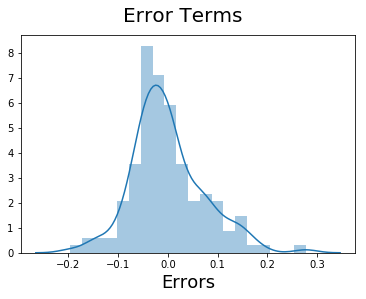

In [3481]:
#calculate the residuals
residual=y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed

### Step 11.  Predictions and Evaluation on the Test Set

#### Applying the scaling on the test sets

In [3482]:
df_test_cp = df_test

In [3483]:
#Scaling the test data set

num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

#As for test dataset no need to fit the dataset because there is no training for the model so using transform
df_test_cp[num_vars] = scaler.transform(df_test_cp[num_vars])
df_test_cp.head()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
15,0.636562,0.582759,0.627948,0.4,0.542969,0.771429,0.550847,0.143119,0.765517,0.485714,...,0,0,0,0,0,1,0,0,0,1
9,0.316295,0.444828,0.549177,0.3,0.238281,0.421429,0.457627,0.143119,0.579310,0.580952,...,0,0,0,0,0,1,0,0,1,0
100,0.110000,0.365517,0.214953,0.2,0.195312,0.564286,0.190678,0.563303,0.496552,0.323810,...,0,1,0,0,0,0,0,0,1,0
132,0.167122,0.431034,0.373387,0.2,0.199219,0.714286,0.245763,0.343119,0.724138,0.447619,...,0,0,0,0,0,1,0,0,1,0
68,0.574202,0.806897,0.859368,0.3,0.441406,0.742857,0.300847,0.313761,0.798276,0.809524,...,0,0,0,1,0,0,0,0,0,1


In [3484]:
df_test_cp.describe()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.194993,0.405395,0.309660,0.230645,0.221333,0.579263,0.205372,0.508760,0.483648,0.373425,...,0.032258,0.370968,0.032258,0.129032,0.016129,0.370968,0.048387,0.0,0.354839,0.112903
std,0.208323,0.204468,0.230834,0.093368,0.165835,0.191679,0.159743,0.290709,0.209627,0.196487,...,0.178127,0.487007,0.178127,0.337972,0.127000,0.487007,0.216335,0.0,0.482370,0.319058
min,0.000819,0.000000,-0.147308,0.000000,-0.035156,0.264286,-0.016949,0.003670,-0.060345,-0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.066041,0.272414,0.136182,0.200000,0.105469,0.435714,0.072034,0.254128,0.374138,0.190476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.111117,0.350000,0.256342,0.200000,0.175781,0.564286,0.177966,0.491743,0.475862,0.347619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.246804,0.527586,0.477637,0.200000,0.296875,0.767857,0.283898,0.693578,0.577586,0.447619,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
max,0.898590,1.182759,0.926124,0.600000,0.929688,0.900000,0.656780,1.337615,1.094828,0.942857,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### Dividing into X_test and y_test

In [3485]:
#Dividing into X and y
y_test = df_test_cp.pop('price')
X_test = df_test_cp

In [3486]:
#Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
15,1.0,0.582759,0.627948,0.4,0.542969,0.771429,0.550847,0.143119,0.765517,0.485714,...,0,0,0,0,0,1,0,0,0,1
9,1.0,0.444828,0.549177,0.3,0.238281,0.421429,0.457627,0.143119,0.579310,0.580952,...,0,0,0,0,0,1,0,0,1,0
100,1.0,0.365517,0.214953,0.2,0.195312,0.564286,0.190678,0.563303,0.496552,0.323810,...,0,1,0,0,0,0,0,0,1,0
132,1.0,0.431034,0.373387,0.2,0.199219,0.714286,0.245763,0.343119,0.724138,0.447619,...,0,0,0,0,0,1,0,0,1,0
68,1.0,0.806897,0.859368,0.3,0.441406,0.742857,0.300847,0.313761,0.798276,0.809524,...,0,0,0,1,0,0,0,0,0,1


In [3487]:
#filter only the variables got in the final model
X_train_new = X_train_new.drop('const',axis=1)
X_test_sm = X_test_sm[X_train_new.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,horsepower,turbo,hatchback,sedan,wagon,spdi,High
15,1.0,0.550847,0,0,1,0,0,1
9,1.0,0.457627,1,1,0,0,0,0
100,1.0,0.190678,0,0,1,0,0,0
132,1.0,0.245763,0,1,0,0,0,0
68,1.0,0.300847,1,0,0,1,0,1


### Step 12 Model Evaluation

In [3488]:
#predict
y_test_pred = lm.predict(X_test_sm)

In [3489]:
#Evaluate
from sklearn.metrics import r2_score 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8472174968379192

### This seems perfect as r2 on Training set was approx 86 and on test set it is 84.7

Text(0, 0.5, 'y_pred')

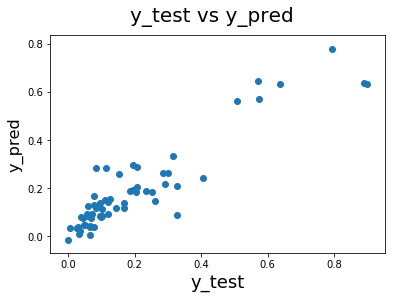

In [3490]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Relationship shows a linear and maximum variance of data explained by model

In [3491]:
#Training dataset summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:46:56   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.029      4.284      0.0

We can see that the equation of our best fitted line is:

$ price = 0.1253(constant) + 0.5783  \times  horsepower + 0.0714  \times  turbo  - 0.1291 \times hatchback 
 - 0.0845 \times sedan - 0.0746 \times wagon - 0.1073 \times spdi + 0.2740 \times High 

So Price features depends on - horsepower,carwidth,hatchback,enginetype is dohcv,car company is high end(BMW,JAguar,PORSCHE)


### Model 1 using Manual Approach
### Repeat Step 8 to Step 12

In [3492]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train_m, df_test_m = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 42)

In [3493]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
#df_train
df_train_m[num_vars] = scaler.fit_transform(df_train_m[num_vars])

In [3494]:
#Dividing data into X and y variables
y_train_m = df_train_m.pop('price')
X_train_m = df_train_m


### Model Building using all the variables

Model 1

In [3495]:
X_train_1 = build_model(X_train_m,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.66e-68
Time:                        15:47:01   Log-Likelihood:                 274.39
No. Observations:                 143   AIC:                            -484.8
Df Residuals:                     111   BIC:                            -390.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1657    

As p-value for carlength is > 0.05 so remove carlength and update the model

Model 2

In [3496]:
X_train_1 = X_train_1.drop(["carlength"], axis = 1)
X_train_2 = build_model(X_train_1,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.50e-69
Time:                        15:47:01   Log-Likelihood:                 274.39
No. Observations:                 143   AIC:                            -486.8
Df Residuals:                     112   BIC:                            -394.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1657    

spfi having p-value>0.05 so drop it and update the model

Model 3

In [3497]:
X_train_2 = X_train_2.drop(["spfi"], axis = 1)
X_train_3 = build_model(X_train_2,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.29e-70
Time:                        15:47:01   Log-Likelihood:                 274.38
No. Observations:                 143   AIC:                            -488.8
Df Residuals:                     113   BIC:                            -399.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1655    

In [3498]:
#ohcf p-value is high so drop it
X_train_3 = X_train_3.drop(["ohcf"], axis = 1)

Model 4

In [3499]:
X_train_4 = build_model(X_train_3,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.03e-71
Time:                        15:47:01   Log-Likelihood:                 274.37
No. Observations:                 143   AIC:                            -490.7
Df Residuals:                     114   BIC:                            -404.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1616    

In [3500]:
#cylindernumber p-value is high so drop it
X_train_4 = X_train_4.drop(["cylindernumber"], axis = 1)

Model 5

In [3501]:
X_train_5 = build_model(X_train_4,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.81e-72
Time:                        15:47:02   Log-Likelihood:                 274.33
No. Observations:                 143   AIC:                            -492.7
Df Residuals:                     115   BIC:                            -409.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1552    

In [3502]:
#hardtop p-value is high so drop it
X_train_5 = X_train_5.drop(["hardtop"], axis = 1)

Model 6

In [3503]:
X_train_6 = build_model(X_train_5,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.73e-73
Time:                        15:47:02   Log-Likelihood:                 274.19
No. Observations:                 143   AIC:                            -494.4
Df Residuals:                     116   BIC:                            -414.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1673    

In [3504]:
#fueleconomy p-value is high so drop it
X_train_6 = X_train_6.drop(["fueleconomy"], axis = 1)

Model 7

In [3505]:
X_train_7 = build_model(X_train_6,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.79e-74
Time:                        15:47:02   Log-Likelihood:                 273.97
No. Observations:                 143   AIC:                            -495.9
Df Residuals:                     117   BIC:                            -418.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1808    

In [3506]:
#mfi p-value is high so drop it
X_train_7 = X_train_7.drop(["mfi"], axis = 1)

Model 8

In [3507]:
X_train_8 = build_model(X_train_7,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.79e-74
Time:                        15:47:02   Log-Likelihood:                 273.97
No. Observations:                 143   AIC:                            -495.9
Df Residuals:                     117   BIC:                            -418.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1808    

In [3508]:
#dohcv p-value is high so drop it
X_train_8 = X_train_8.drop(["dohcv"], axis = 1)

Model 9

In [3509]:
X_train_9 = build_model(X_train_8,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.65e-75
Time:                        15:47:03   Log-Likelihood:                 273.81
No. Observations:                 143   AIC:                            -497.6
Df Residuals:                     118   BIC:                            -423.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1863    

In [3510]:
#4bbl p-value is high so drop it
X_train_9 = X_train_9.drop(["4bbl"], axis = 1)

Model 10

In [3511]:
X_train_10 = build_model(X_train_9,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.64e-76
Time:                        15:47:03   Log-Likelihood:                 273.56
No. Observations:                 143   AIC:                            -499.1
Df Residuals:                     119   BIC:                            -428.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1854    

In [3512]:
#rwd p-value is high so drop it
X_train_10 = X_train_10.drop(["rwd"], axis = 1)

Model 11

In [3513]:
X_train_11 = build_model(X_train_10,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     154.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.69e-77
Time:                        15:47:03   Log-Likelihood:                 273.26
No. Observations:                 143   AIC:                            -500.5
Df Residuals:                     120   BIC:                            -432.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1782    

In [3514]:
#enginesize p-value is high so drop it
X_train_11 = X_train_11.drop(["ohcv"], axis = 1)

Model 12

In [3515]:
X_train_12 = build_model(X_train_11,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     162.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.13e-78
Time:                        15:47:04   Log-Likelihood:                 272.77
No. Observations:                 143   AIC:                            -501.5
Df Residuals:                     121   BIC:                            -436.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1803    

In [3516]:
#ohc p-value is high so drop it
X_train_12 = X_train_12.drop(["ohc"], axis = 1)

Model 13

In [3517]:
X_train_13 = build_model(X_train_12,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     170.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.16e-79
Time:                        15:47:04   Log-Likelihood:                 272.42
No. Observations:                 143   AIC:                            -502.8
Df Residuals:                     122   BIC:                            -440.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1744    

In [3518]:
#mpfi p-value is high so drop it
X_train_13 = X_train_13.drop(["mpfi"], axis = 1)

Model 14

In [3519]:
X_train_14 = build_model(X_train_13,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     179.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.50e-80
Time:                        15:47:04   Log-Likelihood:                 271.94
No. Observations:                 143   AIC:                            -503.9
Df Residuals:                     123   BIC:                            -444.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1731    

Model 15

In [3520]:
#2bbl p-value is high so drop it
X_train_14 = X_train_14.drop(["2bbl"], axis = 1)
X_train_15 = build_model(X_train_14,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.05e-81
Time:                        15:47:04   Log-Likelihood:                 271.71
No. Observations:                 143   AIC:                            -505.4
Df Residuals:                     124   BIC:                            -449.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1720    

Model 16

In [3521]:
#fwd p-value is high so drop it
X_train_15 = X_train_15.drop(["fwd"], axis = 1)
X_train_16 = build_model(X_train_15,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.15e-82
Time:                        15:47:04   Log-Likelihood:                 270.68
No. Observations:                 143   AIC:                            -505.4
Df Residuals:                     125   BIC:                            -452.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1598    

Model 17

In [3522]:
#enginesize p-value is high so drop it
X_train_16 = X_train_16.drop(["enginesize"], axis = 1)
X_train_17 = build_model(X_train_16,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.72e-82
Time:                        15:47:05   Log-Likelihood:                 268.84
No. Observations:                 143   AIC:                            -503.7
Df Residuals:                     126   BIC:                            -453.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1648    

In [3523]:
checkVIF(X_train_17)

,Features,VIF
6,gas,113.48
13,idi,10.14
1,curbweight,10.02
9,sedan,7.25
3,horsepower,6.46
8,hatchback,6.43
0,wheelbase,6.25
4,carwidth,4.97
10,wagon,3.83
16,High,2.47


Model 18

In [3524]:
#wheelbase p-value is high so drop it
X_train_17 = X_train_17.drop(["wheelbase"], axis = 1)
X_train_18 = build_model(X_train_17,y_train_m)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.44e-83
Time:                        15:47:05   Log-Likelihood:                 266.87
No. Observations:                 143   AIC:                            -501.7
Df Residuals:                     127   BIC:                            -454.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1631    

Above model seems good as having all p-values less than <0.05 and R-square as 96%

In [3525]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_18)

,Features,VIF
5,gas,113.48
12,idi,10.08
0,curbweight,7.61
8,sedan,6.17
7,hatchback,5.99
2,horsepower,5.26
3,carwidth,3.94
9,wagon,3.35
15,High,2.43
6,turbo,2.00


In [3526]:
#dropping gas because of high VIF value.
X_train_18 = X_train_18.drop(["gas"], axis = 1)

Model 19

In [3527]:
X_train_19 = build_model(X_train_18,y_train_m)
checkVIF(X_train_19)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.44e-83
Time:                        15:47:06   Log-Likelihood:                 266.87
No. Observations:                 143   AIC:                            -501.7
Df Residuals:                     127   BIC:                            -454.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2622    

,Features,VIF
4,enginelocation_Code,35.29
0,curbweight,21.46
3,carwidth,18.32
1,boreratio,14.72
2,horsepower,12.23
7,sedan,12.02
6,hatchback,8.89
8,wagon,3.72
14,High,2.68
13,Medium,2.55


In [3528]:
#enginelocation_Code VIF is high so drop it
X_train_19 = X_train_19.drop(["enginelocation_Code"], axis = 1)

Model 20

In [3529]:
X_train_20 = build_model(X_train_19,y_train_m)
checkVIF(X_train_20)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.03e-79
Time:                        15:47:06   Log-Likelihood:                 255.51
No. Observations:                 143   AIC:                            -481.0
Df Residuals:                     128   BIC:                            -436.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1154      0.021      5.482      0.0

,Features,VIF
0,curbweight,21.17
3,carwidth,18.12
2,horsepower,11.97
1,boreratio,11.31
6,sedan,4.13
5,hatchback,3.12
13,High,2.61
12,Medium,2.54
4,turbo,2.35
7,wagon,2.16


In [3530]:
#idi p-value is high so drop it
X_train_20 = X_train_20.drop(["idi"], axis = 1)

Model 21

In [3531]:
X_train_21 = build_model(X_train_20,y_train_m)
checkVIF(X_train_21)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-80
Time:                        15:47:07   Log-Likelihood:                 254.98
No. Observations:                 143   AIC:                            -482.0
Df Residuals:                     129   BIC:                            -440.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1124      0.021      5.396      0.0

,Features,VIF
0,curbweight,20.28
3,carwidth,17.94
1,boreratio,11.30
2,horsepower,9.59
6,sedan,4.10
5,hatchback,3.12
12,High,2.59
11,Medium,2.52
7,wagon,2.15
4,turbo,1.77


In [3532]:
#curbweight VIF is high so drop it
X_train_21 = X_train_21.drop(["curbweight"], axis = 1)

Model 22

In [3533]:
X_train_22 = build_model(X_train_21,y_train_m)
checkVIF(X_train_22)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     168.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.98e-73
Time:                        15:47:07   Log-Likelihood:                 232.47
No. Observations:                 143   AIC:                            -438.9
Df Residuals:                     130   BIC:                            -400.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1071      0.024      4.413      0.0

,Features,VIF
2,carwidth,11.23
0,boreratio,11.08
1,horsepower,7.49
5,sedan,4.03
4,hatchback,2.87
10,Medium,2.52
11,High,2.52
6,wagon,2.10
3,turbo,1.75
7,l,1.51


Model 23

In [3534]:
#l p-value is high so drop it
X_train_22 = X_train_22.drop(["l"], axis = 1)
X_train_23 = build_model(X_train_22,y_train_m)
checkVIF(X_train_23)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.05e-74
Time:                        15:47:08   Log-Likelihood:                 232.09
No. Observations:                 143   AIC:                            -440.2
Df Residuals:                     131   BIC:                            -404.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1099      0.024      4.580      0.0

,Features,VIF
0,boreratio,10.88
2,carwidth,10.73
1,horsepower,6.88
5,sedan,3.91
4,hatchback,2.75
10,High,2.52
9,Medium,2.41
6,wagon,2.09
3,turbo,1.69
8,spdi,1.34


Model 24

In [3535]:
#medium p-value is high so drop it
X_train_23 = X_train_23.drop(["Medium"], axis = 1)
X_train_24 = build_model(X_train_23,y_train_m)
checkVIF(X_train_24)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.63e-74
Time:                        15:47:08   Log-Likelihood:                 230.40
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     132   BIC:                            -406.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.024      4.616      0.0

,Features,VIF
0,boreratio,10.72
2,carwidth,9.84
1,horsepower,6.83
5,sedan,3.90
4,hatchback,2.73
6,wagon,2.07
9,High,2.00
3,turbo,1.68
8,spdi,1.27
7,rotor,1.06


Model 25

In [3536]:
#boreratio VIF is high so drop it
X_train_24 = X_train_24.drop(["boreratio"], axis = 1)
X_train_25 = build_model(X_train_24,y_train_m)
checkVIF(X_train_25)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.14e-75
Time:                        15:47:08   Log-Likelihood:                 228.20
No. Observations:                 143   AIC:                            -436.4
Df Residuals:                     133   BIC:                            -406.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.020      4.154      0.0

,Features,VIF
1,carwidth,9.03
0,horsepower,6.01
4,sedan,2.82
3,hatchback,2.06
8,High,1.99
2,turbo,1.68
5,wagon,1.67
7,spdi,1.27
6,rotor,1.06


Model 26

In [3537]:
#carwidth VIF is high so drop it
X_train_25 = X_train_25.drop(["carwidth"], axis = 1)
X_train_26 = build_model(X_train_25,y_train_m)
checkVIF(X_train_26)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.81e-54
Time:                        15:47:08   Log-Likelihood:                 173.28
No. Observations:                 143   AIC:                            -328.6
Df Residuals:                     134   BIC:                            -301.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1267      0.029      4.352      0.0

,Features,VIF
0,horsepower,3.98
7,High,1.94
3,sedan,1.68
2,hatchback,1.64
1,turbo,1.61
4,wagon,1.26
6,spdi,1.23
5,rotor,1.06


Model 27

In [3538]:
#rotor p-value is high so drop it
X_train_26 = X_train_26.drop(["rotor"], axis = 1)
X_train_27 = build_model(X_train_26,y_train_m)
checkVIF(X_train_27)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:47:08   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.029      4.284      0.0

,Features,VIF
0,horsepower,3.95
6,High,1.93
3,sedan,1.68
1,turbo,1.61
2,hatchback,1.61
4,wagon,1.25
5,spdi,1.23


##### Above model seems good as all variables p-value low, RSquare is approx 86 and Adj. R-square is 85.2% and VIF for all independent variables below 5

### Step 10. Residual Analysis of Model

In [3539]:
#Get the model by passing final model variables
lm_1 = sm.OLS(y_train_m,X_train_27).fit()
y_train_pred = lm_1.predict(X_train_27)

Text(0.5, 0, 'Errors')

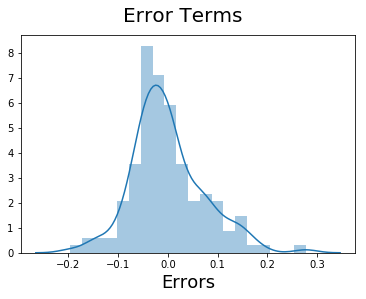

In [3540]:
#calculate the residuals
residual=y_train_m - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Manual- Step 11. Predictions and Evaluation on the Test Set

#### Applying the scaling on the test sets

In [3541]:
#copy the test df 
df_test_cp_m = df_test_m
df_test_m.head()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
15,30760,103.5,3230,6,209,3.62,182,18.70,189.0,66.9,...,0,0,0,0,0,1,0,0,0,1
9,17859,99.5,3053,5,131,3.13,160,18.70,178.2,67.9,...,0,0,0,0,0,1,0,0,1,0
100,9549,97.2,2302,4,120,3.33,97,30.15,173.4,65.2,...,0,1,0,0,0,0,0,0,1,0
132,11850,99.1,2658,4,121,3.54,110,24.15,186.6,66.5,...,0,0,0,0,0,1,0,0,1,0
68,28248,110.0,3750,5,183,3.58,123,23.35,190.9,70.3,...,0,0,0,1,0,0,0,0,0,1


In [3542]:
#Scaling the test data set

num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

#As for test dataset no need to fit the dataset because there is no training for the model so using transform
df_test_cp_m[num_vars] = scaler.transform(df_test_cp_m[num_vars])
df_test_cp_m.head()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
15,0.636562,0.582759,0.627948,0.4,0.542969,0.771429,0.550847,0.143119,0.765517,0.485714,...,0,0,0,0,0,1,0,0,0,1
9,0.316295,0.444828,0.549177,0.3,0.238281,0.421429,0.457627,0.143119,0.579310,0.580952,...,0,0,0,0,0,1,0,0,1,0
100,0.110000,0.365517,0.214953,0.2,0.195312,0.564286,0.190678,0.563303,0.496552,0.323810,...,0,1,0,0,0,0,0,0,1,0
132,0.167122,0.431034,0.373387,0.2,0.199219,0.714286,0.245763,0.343119,0.724138,0.447619,...,0,0,0,0,0,1,0,0,1,0
68,0.574202,0.806897,0.859368,0.3,0.441406,0.742857,0.300847,0.313761,0.798276,0.809524,...,0,0,0,1,0,0,0,0,0,1


In [3543]:
df_test_cp_m.describe()

,price,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.194993,0.405395,0.309660,0.230645,0.221333,0.579263,0.205372,0.508760,0.483648,0.373425,...,0.032258,0.370968,0.032258,0.129032,0.016129,0.370968,0.048387,0.0,0.354839,0.112903
std,0.208323,0.204468,0.230834,0.093368,0.165835,0.191679,0.159743,0.290709,0.209627,0.196487,...,0.178127,0.487007,0.178127,0.337972,0.127000,0.487007,0.216335,0.0,0.482370,0.319058
min,0.000819,0.000000,-0.147308,0.000000,-0.035156,0.264286,-0.016949,0.003670,-0.060345,-0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.066041,0.272414,0.136182,0.200000,0.105469,0.435714,0.072034,0.254128,0.374138,0.190476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.111117,0.350000,0.256342,0.200000,0.175781,0.564286,0.177966,0.491743,0.475862,0.347619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.246804,0.527586,0.477637,0.200000,0.296875,0.767857,0.283898,0.693578,0.577586,0.447619,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
max,0.898590,1.182759,0.926124,0.600000,0.929688,0.900000,0.656780,1.337615,1.094828,0.942857,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### Dividing into X_test and y_test

In [3544]:
y_test = df_test_cp_m.pop('price')
X_test = df_test_cp_m

In [3545]:
lm_1.params

const         0.125303
horsepower    0.578328
turbo         0.071449
hatchback    -0.129070
sedan        -0.084487
wagon        -0.074600
spdi         -0.107252
High          0.273992
dtype: float64

In [3546]:
#filter only the variables got in the final model
X_train_27 = X_train_27.drop('const',axis=1)
X_test_sm = X_test_sm[X_train_27.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,horsepower,turbo,hatchback,sedan,wagon,spdi,High
15,1.0,0.550847,0,0,1,0,0,1
9,1.0,0.457627,1,1,0,0,0,0
100,1.0,0.190678,0,0,1,0,0,0
132,1.0,0.245763,0,1,0,0,0,0
68,1.0,0.300847,1,0,0,1,0,1


### Manual - Step 12 Model Evaluation

In [3547]:
#predict
y_test_pred = lm_1.predict(X_test_sm)

In [3548]:
#Evaluate
from sklearn.metrics import r2_score 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8472174968379192

### This seems perfect as r2 on Training set was approx 86 and on test set it is 84.7

Text(0, 0.5, 'y_pred')

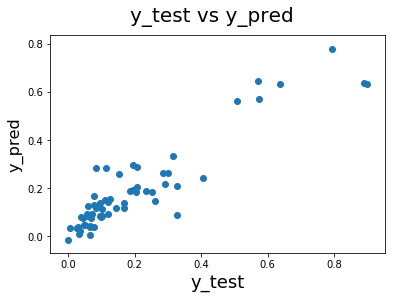

In [3549]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Relationship shows a linear and maximum variance of data explained by model

In [3550]:
#Training dataset summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:47:16   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.029      4.284      0.0

We can see that the equation of our best fitted line is:

$ price =  0.1253(constant) + 0.5783  \times  horsepower + 0.0714  \times  turbo  -0.1291 \times hatchback 
 -0.0845 \times sedan - 0.0746 \times wagon - 0.1073 \times spdi  + 0.2740  \times  High 

So Price features depends on - horsepower,turbo,hatchback,sedan,wagon,spdi,car company is medium and high end(BMW,JAguar,PORSCHE)

# Conclusion

#### 
1. R-Squared and Adjusted R-squared (extent of fit) - approx 86% explained
2. P-values for all the coeffeicient are less than 0.05 which means all predictors are statistically significant
3. VIF for all the predictors are less than 5 so no multicollinearity exists
4. Prob (F-Statistics) value is low which means Model fit is significant and not by chance

BEST FIT LINE:

We got 2 same equations from RFE and Manual having same features and Values

RFE - 
$ price = 0.1253(constant) + 0.5783  \times  horsepower + 0.0714  \times  turbo  - 0.1291 \times hatchback 
 - 0.0845 \times sedan - 0.0746 \times wagon - 0.1073 \times spdi + 0.2740 \times wagon 

Manual-
$ price =  0.1253(constant) + 0.5783  \times  horsepower + 0.0714  \times  turbo  -0.1291 \times hatchback 
- 0.0845 \times sedan - 0.0746 \times wagon - 0.1073 \times spdi  + 0.2740  \times  High 

So from above it is must sure that Car Price is dependent on Horsepower,turbo, bodytype as wagon(negative),fuelsystem as spdi(negative) cartype as sedan,hatchback(negative) and CarCompany manufacturing
High end cars



## Model 2 using RFE

#### Step 4 to 12

In [3551]:
#copy the df for regression
#Import for LabelEncoder
from sklearn.preprocessing import LabelEncoder

car_lr2 = df_car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','enginelocation','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize','fuelsystem', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth','carsrange']]
car_lr2.head()

,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,115,19.80,176.6,66.4,Medium


In [3552]:
# Convert all binary values to 0 and 1 for enginelocation,aspiration,fueltype

car_lr2["enginelocation"] = np.where(car_lr2["enginelocation"].str.contains("front"), 1, 0)
car_lr2["aspiration"] = np.where(car_lr2["aspiration"].str.contains("std"), 1, 0)
car_lr2["fueltype"] = np.where(car_lr2["fueltype"].str.contains("gas"), 1, 0)
car_lr2.head()


,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
1,16500,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
2,16500,1,1,hatchback,rwd,1,94.5,2823,ohcv,six,152,mpfi,2.68,154,22.15,171.2,65.5,Medium
3,13950,1,1,sedan,fwd,1,99.8,2337,ohc,four,109,mpfi,3.19,102,26.70,176.6,66.2,Medium
4,17450,1,1,sedan,4wd,1,99.4,2824,ohc,five,136,mpfi,3.19,115,19.80,176.6,66.4,Medium


In [3553]:
#cylindernum contains number so lets replcae string with numbers
nums = {"cylindernumber": {"four":4,"six":6,"five":5,"eight":8,"two":2,"twelve":12,"three":3}}
car_lr2.replace(nums, inplace=True)
car_lr2.head()

,price,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,1,1,convertible,rwd,1,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
1,16500,1,1,convertible,rwd,1,88.6,2548,dohc,4,130,mpfi,3.47,111,23.70,168.8,64.1,Medium
2,16500,1,1,hatchback,rwd,1,94.5,2823,ohcv,6,152,mpfi,2.68,154,22.15,171.2,65.5,Medium
3,13950,1,1,sedan,fwd,1,99.8,2337,ohc,4,109,mpfi,3.19,102,26.70,176.6,66.2,Medium
4,17450,1,1,sedan,4wd,1,99.4,2824,ohc,5,136,mpfi,3.19,115,19.80,176.6,66.4,Medium


Dummy Variables for Categorical variables to convert into numeric for model

In [3554]:
car_lr2 = dummies('carbody',car_lr2)
car_lr2 = dummies('drivewheel',car_lr2)
car_lr2 = dummies('enginetype',car_lr2)
car_lr2 = dummies('fuelsystem',car_lr2)
car_lr2 = dummies('carsrange',car_lr2)

In [3555]:
car_lr2.head()

,price,fueltype,aspiration,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,13495,1,1,1,88.6,2548,4,130,3.47,111,...,0,0,0,0,0,1,0,0,1,0
1,16500,1,1,1,88.6,2548,4,130,3.47,111,...,0,0,0,0,0,1,0,0,1,0
2,16500,1,1,1,94.5,2823,6,152,2.68,154,...,0,0,0,0,0,1,0,0,1,0
3,13950,1,1,1,99.8,2337,4,109,3.19,102,...,0,0,0,0,0,1,0,0,1,0
4,17450,1,1,1,99.4,2824,5,136,3.19,115,...,0,0,0,0,0,1,0,0,1,0


In [3556]:
car_lr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
price             205 non-null int32
fueltype          205 non-null int32
aspiration        205 non-null int32
enginelocation    205 non-null int32
wheelbase         205 non-null float64
curbweight        205 non-null int64
cylindernumber    205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
fueleconomy       205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
fwd               205 non-null uint8
rwd               205 non-null uint8
dohcv             205 non-null uint8
l                 205 non-null uint8
ohc               205 non-null uint8
ohcf              205 non-null uint8
ohcv              205 non-null uin

### Step 5. Splitting the data into Training and Testing Sets

In [3557]:
np.random.seed(0)
df_train, df_test = train_test_split(car_lr2, train_size = 0.7, test_size = 0.3, random_state = 42)

In [3558]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
#df_train
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [3559]:
df_train.describe()

,price,fueltype,aspiration,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.205811,0.916084,0.811189,0.986014,0.425175,0.335664,0.241259,0.222711,0.557542,0.227539,...,0.013986,0.300699,0.006993,0.083916,0.0,0.496503,0.041958,0.006993,0.377622,0.118881
std,0.194490,0.278236,0.392734,0.117845,0.209439,0.232474,0.114035,0.161861,0.194528,0.170949,...,0.117845,0.460174,0.083624,0.278236,0.0,0.501745,0.201198,0.083624,0.486496,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068976,1.000000,1.000000,1.000000,0.272414,0.165332,0.200000,0.109375,0.435714,0.095339,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140931,1.000000,1.000000,1.000000,0.365517,0.277704,0.200000,0.195312,0.550000,0.182203,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.284358,1.000000,1.000000,1.000000,0.537931,0.504673,0.200000,0.277344,0.714286,0.271186,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [3560]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

df_test_m = df_test

### Step6. Training the Model using RFE

In [3561]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [3562]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('fueleconomy', False, 3),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('hardtop', False, 9),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 10),
 ('ohcf', False, 11),
 ('ohcv', False, 8),
 ('rotor', True, 1),
 ('2bbl', False, 6),
 ('4bbl', False, 5),
 ('idi', False, 4),
 ('mfi', False, 14),
 ('mpfi', False, 7),
 ('spdi', True, 1),
 ('spfi', False, 13),
 ('Medium', False, 2),
 ('High', True, 1)]

In [3563]:
# Value having True as selected as significant and number indicates the priority
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'carwidth',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'rotor',
       'spdi', 'High'],
      dtype='object')

Building model using statsmodel, for the detailed analysis

In [3564]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,fueltype,aspiration,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,carwidth,hatchback,sedan,wagon,fwd,rwd,dohcv,l,rotor,spdi,High
177,1,1,1,0.544828,0.284379,0.2,0.203125,0.550000,0.169492,0.447619,1,0,0,1,0,0,0,0,0,0
75,1,0,1,0.555172,0.485536,0.2,0.273438,0.885714,0.521186,0.590476,1,0,0,0,1,0,0,0,0,0
174,0,0,1,0.544828,0.294170,0.2,0.156250,0.521429,0.088983,0.447619,0,1,0,1,0,0,0,0,0,0
31,1,1,1,0.000000,0.000000,0.2,0.085938,0.264286,0.101695,0.200000,1,0,0,1,0,0,0,0,0,0
12,1,1,1,0.503448,0.396529,0.4,0.367188,0.550000,0.292373,0.285714,0,1,0,0,1,0,0,0,0,1


Model 1

In [3565]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.97e-78
Time:                        15:47:28   Log-Likelihood:                 268.78
No. Observations:                 143   AIC:                            -495.6
Df Residuals:                     122   BIC:                            -433.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3033      0.050      6.

As p-value for cylindernumber is > 0.05 so remove and update the model

Model 2

In [3566]:
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.16e-79
Time:                        15:47:28   Log-Likelihood:                 268.59
No. Observations:                 143   AIC:                            -497.2
Df Residuals:                     123   BIC:                            -437.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2917      0.046      6.

,Features,VIF
2,enginelocation,82.35
4,curbweight,54.16
3,wheelbase,35.39
7,horsepower,34.77
5,enginesize,34.03
0,fueltype,32.55
8,carwidth,27.50
12,fwd,19.60
13,rwd,16.19
10,sedan,16.07


As p-value for rwd is > 0.05 so remove and update the model

Model 3

In [3567]:
X_train_new = X_train_new.drop(["rwd"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.31e-80
Time:                        15:47:28   Log-Likelihood:                 268.19
No. Observations:                 143   AIC:                            -498.4
Df Residuals:                     124   BIC:                            -442.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2801      0.044      6.

,Features,VIF
2,enginelocation,59.98
4,curbweight,52.01
5,enginesize,33.48
3,wheelbase,32.40
0,fueltype,30.50
8,carwidth,27.19
7,horsepower,27.07
6,boreratio,15.37
10,sedan,15.31
1,aspiration,13.56


Model 4

In [3568]:
#dohcv p-value is high so remove it
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.07e-81
Time:                        15:47:28   Log-Likelihood:                 267.84
No. Observations:                 143   AIC:                            -499.7
Df Residuals:                     125   BIC:                            -446.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2931      0.040      7.

,Features,VIF
2,enginelocation,58.77
4,curbweight,50.66
3,wheelbase,32.19
5,enginesize,29.53
0,fueltype,25.55
8,carwidth,25.52
7,horsepower,19.81
6,boreratio,15.37
10,sedan,15.24
1,aspiration,12.25


Model 5

In [3569]:
#fwd p-value is high so remove it
X_train_new = X_train_new.drop(["fwd"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     203.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.94e-82
Time:                        15:47:29   Log-Likelihood:                 267.10
No. Observations:                 143   AIC:                            -500.2
Df Residuals:                     126   BIC:                            -449.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2762      0.038      7.

,Features,VIF
2,enginelocation,54.80
4,curbweight,40.15
3,wheelbase,32.16
5,enginesize,27.70
0,fueltype,25.53
8,carwidth,22.50
7,horsepower,19.70
6,boreratio,14.91
10,sedan,14.67
1,aspiration,12.24


Model 6

In [3570]:
#wheelbase p-value is high so remove it
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     213.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.33e-82
Time:                        15:47:29   Log-Likelihood:                 265.42
No. Observations:                 143   AIC:                            -498.8
Df Residuals:                     127   BIC:                            -451.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2742      0.038      7.

,Features,VIF
2,enginelocation,54.77
3,curbweight,33.17
4,enginesize,27.67
0,fueltype,24.82
7,carwidth,17.74
6,horsepower,16.02
5,boreratio,14.81
9,sedan,12.49
1,aspiration,11.95
8,hatchback,9.04


Model 7

In [3571]:
#enginesize p-value is high so remove it
X_train_new = X_train_new.drop(["enginesize"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.17e-83
Time:                        15:47:29   Log-Likelihood:                 264.04
No. Observations:                 143   AIC:                            -498.1
Df Residuals:                     128   BIC:                            -453.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2752      0.038      7.

,Features,VIF
2,enginelocation,54.05
0,fueltype,23.68
3,curbweight,22.73
6,carwidth,17.73
4,boreratio,14.80
5,horsepower,13.49
8,sedan,11.89
1,aspiration,9.89
7,hatchback,8.81
9,wagon,3.69


Model 8

In [3572]:
#enginelocation VIF is high so remove it
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.36e-80
Time:                        15:47:29   Log-Likelihood:                 252.73
No. Observations:                 143   AIC:                            -477.5
Df Residuals:                     129   BIC:                            -436.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1403      0.027      5.228      0.0

,Features,VIF
2,curbweight,21.14
0,fueltype,20.36
5,carwidth,17.27
3,boreratio,13.26
4,horsepower,12.02
1,aspiration,9.48
7,sedan,6.02
6,hatchback,4.74
8,wagon,2.78
12,High,2.12


Model 9

In [3573]:
#carwidth VIF is high so remove it
X_train_new = X_train_new.drop(["fueltype"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-80
Time:                        15:47:29   Log-Likelihood:                 251.93
No. Observations:                 143   AIC:                            -477.9
Df Residuals:                     130   BIC:                            -439.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1505      0.026      5.893      0.0

,Features,VIF
1,curbweight,20.30
4,carwidth,17.22
2,boreratio,12.42
3,horsepower,9.37
6,sedan,5.23
0,aspiration,5.21
5,hatchback,4.06
7,wagon,2.48
11,High,2.03
8,l,1.59


Model 10

In [3574]:
#curbweight VIF is high so remove it
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.17e-73
Time:                        15:47:30   Log-Likelihood:                 230.49
No. Observations:                 143   AIC:                            -437.0
Df Residuals:                     131   BIC:                            -401.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1519      0.030      5.142      0.0

,Features,VIF
1,boreratio,12.10
3,carwidth,10.56
2,horsepower,7.28
5,sedan,5.20
0,aspiration,5.15
4,hatchback,3.90
6,wagon,2.40
10,High,1.96
7,l,1.46
9,spdi,1.23


Model 11

In [3575]:
#l p-value is high so remove it
X_train_new = X_train_new.drop(["l"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.63e-74
Time:                        15:47:30   Log-Likelihood:                 230.40
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     132   BIC:                            -406.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1523      0.029      5.174      0.0

,Features,VIF
1,boreratio,11.53
3,carwidth,9.77
2,horsepower,6.77
5,sedan,5.19
0,aspiration,4.88
4,hatchback,3.88
6,wagon,2.38
9,High,1.94
8,spdi,1.23
7,rotor,1.05


Model 12

In [3576]:
#boreratio VIF is high so remove it
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.14e-75
Time:                        15:47:30   Log-Likelihood:                 228.20
No. Observations:                 143   AIC:                            -436.4
Df Residuals:                     133   BIC:                            -406.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1215      0.026      4.761      0.0

,Features,VIF
2,carwidth,8.72
1,horsepower,5.90
4,sedan,4.70
0,aspiration,4.54
3,hatchback,3.62
5,wagon,2.16
8,High,1.94
7,spdi,1.23
6,rotor,1.05


Model 13

In [3577]:
#carwidth VIF is high so remove it
X_train_new = X_train_new.drop(["carwidth"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.81e-54
Time:                        15:47:30   Log-Likelihood:                 173.28
No. Observations:                 143   AIC:                            -328.6
Df Residuals:                     134   BIC:                            -301.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2001      0.036      5.534      0.0

,Features,VIF
0,aspiration,4.50
1,horsepower,3.58
3,sedan,3.25
2,hatchback,3.07
7,High,1.91
4,wagon,1.66
6,spdi,1.20
5,rotor,1.05


Model 14

In [3578]:
#rotor p-value is high so remove it
X_train_new = X_train_new.drop(["rotor"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:47:30   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1968      0.036      5.425      0.0

,Features,VIF
0,aspiration,4.49
1,horsepower,3.56
3,sedan,3.24
2,hatchback,3.06
6,High,1.91
4,wagon,1.66
5,spdi,1.20


### Step 7. Residual Analysis of Model

In [3579]:
#Get the model by passing final model variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

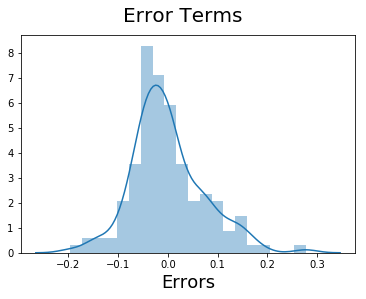

In [3580]:
#calculate the residuals
residual=y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

 ### Step 8. Predictions and Evaluation on the Test Set

In [3581]:
# Applying the scaling on the test sets¶

In [3582]:
df_test_cp = df_test

In [3583]:
#Scaling the test data set

num_vars = ['wheelbase', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

#As for test dataset no need to fit the dataset because there is no training for the model so using transform
df_test_cp[num_vars] = scaler.transform(df_test_cp[num_vars])
df_test_cp.head()

,price,fueltype,aspiration,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
15,0.636562,1,1,1,0.582759,0.627948,0.4,0.542969,0.771429,0.550847,...,0,0,0,0,0,1,0,0,0,1
9,0.316295,1,0,1,0.444828,0.549177,0.3,0.238281,0.421429,0.457627,...,0,0,0,0,0,1,0,0,1,0
100,0.110000,1,1,1,0.365517,0.214953,0.2,0.195312,0.564286,0.190678,...,0,1,0,0,0,0,0,0,1,0
132,0.167122,1,1,1,0.431034,0.373387,0.2,0.199219,0.714286,0.245763,...,0,0,0,0,0,1,0,0,1,0
68,0.574202,0,0,1,0.806897,0.859368,0.3,0.441406,0.742857,0.300847,...,0,0,0,1,0,0,0,0,0,1


#### Step 9 Dividing into X_test and y_test

In [3584]:
#Dividing into X and y
y_test = df_test_cp.pop('price')
X_test = df_test_cp

In [3585]:
#Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

#filter only the variables got in the final model
X_test_sm = X_test_sm[X_train_new.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,aspiration,horsepower,hatchback,sedan,wagon,spdi,High
15,1.0,1,0.550847,0,1,0,0,1
9,1.0,0,0.457627,1,0,0,0,0
100,1.0,1,0.190678,0,1,0,0,0
132,1.0,1,0.245763,1,0,0,0,0
68,1.0,0,0.300847,0,0,1,0,1


### Step 10 Model Evaluation¶

In [3586]:
#predict
y_test_pred = lm.predict(X_test_sm)

In [3587]:
#Evaluate
from sklearn.metrics import r2_score 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8472174968379194

This seems perfect as r2 on Training set was approx 86 and on test set it is 84.7

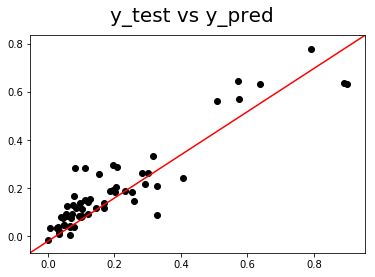

In [3588]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
#fig = plt.figure(figsize=(6,4))
# plt.scatter(y_test,y_test_pred)
# fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
# plt.xlabel('y_test', fontsize=18)                          # X-label
# plt.ylabel('y_pred', fontsize=16)
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('y_test vs y_pred', fontsize=20)  
ax.scatter(y_test,y_test_pred, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

Relationship shows a linear and maximum variance of data explained by model

In [3589]:
#Training dataset summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.49e-54
Time:                        15:47:38   Log-Likelihood:                 172.03
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     135   BIC:                            -304.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1968      0.036      5.425      0.0

### Conclusion

1. R-Squared and Adjusted R-squared (extent of fit) - approx 86% explained
2. P-values for all the coeffeicient are less than 0.05 which means all predictors are statistically significant
3. VIF for all the predictors are less than 5 so no multicollinearity exists
4. Prob (F-Statistics) value is low which means Model fit is significant and not by chance


We can see that the equation of our best fitted line is:

$ price = 0.1968(constant) - 0.0714  \times  aspiration + 0.5783  \times  horsepower  - 0.1291 \times hatchback 
 - 0.0845 \times sedan - 0.0746 \times wagon - 0.1073 \times spdi + 0.2740 \times High 
